## GLOBAL SUPERSTORE'S SALES STRATEGY FORMULATION AND EVALUATION

In [2]:
# type your code here
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sma
from warnings import filterwarnings
filterwarnings('ignore')
from scipy import stats
from sklearn.model_selection import train_test_split

In [3]:
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sma
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [4]:
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,BaggingRegressor,ExtraTreesRegressor,HistGradientBoostingRegressor,StackingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor,ExtraTreeRegressor
from xgboost import XGBRegressor

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, cophenet
from sklearn.decomposition import PCA

In [6]:
plt.rcParams['figure.figsize']=(5,5)

In [7]:
df = pd.read_excel('Global Superstore.xlsx')
df.head()

Category         City        Country Customer ID     Customer Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  记录数 Order Date        Order ID  ... Sales   Segment  \
0       0.0     US    1 2011-01-07  CA-2011-130813  ...    19  Consumer   
1       0.0     US    1 2011-01-21  CA-2011-148614  ...    19  Consumer   
2       0.0     US    1 2011-08-05  CA-2011-118962  ...    21  Consumer   
3       0.0     US    1 2011-08-05  CA-2011-118962  ...   111  Consumer   
4       0.0     US    1 2011-09-29  CA-2011-146969  ...     6  Consumer   

   Ship Date       Ship Mode  Shipping Cost       State  Sub-Category  Year  \
0 2011-01-09    Second Class           4.37  California         Paper  2011   
1 2011-01-26  Standard Class           0.94  California         Paper  2011   
2 2011-08-09  Standard Class           1.81  California         Paper  2011   
3 2011-08-09  Standard Class           4.59  California         Paper  2011   
4 2011-10-03  Standard Class           1.32  California         Paper  2011   

         Market2 weeknum  
0  North America       2  
1  North America       4  
2  North America      32  
3  North America      32  
4  North America      40  

[5 rows x 27 columns]

# Check the attributes of the Dataset

In [8]:
df.shape

(51290, 27)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Category        51290 non-null  object        
 1   City            51290 non-null  object        
 2   Country         51290 non-null  object        
 3   Customer ID     51290 non-null  object        
 4   Customer Name   51290 non-null  object        
 5   Discount        51290 non-null  float64       
 6   Market          51290 non-null  object        
 7   记录数             51290 non-null  int64         
 8   Order Date      51290 non-null  datetime64[ns]
 9   Order ID        51290 non-null  object        
 10  Order Priority  51290 non-null  object        
 11  Product ID      51290 non-null  object        
 12  Product Name    51290 non-null  object        
 13  Profit          51290 non-null  float64       
 14  Quantity        51290 non-null  int64         
 15  Re

In [10]:
df.columns = df.columns.str.replace("-","_")
df.columns = df.columns.str.replace(" ","_")

In [11]:
df.rename(columns={"记录数":"Number_of_Records"}, inplace=True)
df["Number_of_Records"].head()

0    1
1    1
2    1
3    1
4    1
Name: Number_of_Records, dtype: int64

In [12]:
df['Ship_Order_Date'] = (df['Ship_Date'] - df['Order_Date'])
df['Ship_Order_Date'] = df['Ship_Order_Date'].apply(lambda x: x.days)

In [13]:
df['Month'] = df['Order_Date'].apply(lambda x: x.month)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Category           51290 non-null  object        
 1   City               51290 non-null  object        
 2   Country            51290 non-null  object        
 3   Customer_ID        51290 non-null  object        
 4   Customer_Name      51290 non-null  object        
 5   Discount           51290 non-null  float64       
 6   Market             51290 non-null  object        
 7   Number_of_Records  51290 non-null  int64         
 8   Order_Date         51290 non-null  datetime64[ns]
 9   Order_ID           51290 non-null  object        
 10  Order_Priority     51290 non-null  object        
 11  Product_ID         51290 non-null  object        
 12  Product_Name       51290 non-null  object        
 13  Profit             51290 non-null  float64       
 14  Quanti

In [15]:
df.describe()

Discount  Number_of_Records        Profit      Quantity  \
count  51290.000000            51290.0  51290.000000  51290.000000   
mean       0.142908                1.0     28.610982      3.476545   
std        0.212280                0.0    174.340972      2.278766   
min        0.000000                1.0  -6599.978000      1.000000   
25%        0.000000                1.0      0.000000      2.000000   
50%        0.000000                1.0      9.240000      3.000000   
75%        0.200000                1.0     36.810000      5.000000   
max        0.850000                1.0   8399.976000     14.000000   

            Row_ID         Sales  Shipping_Cost          Year       weeknum  \
count  51290.00000  51290.000000   51290.000000  51290.000000  51290.000000   
mean   25645.50000    246.498440      26.375818   2012.777208     31.287112   
std    14806.29199    487.567175      57.296810      1.098931     14.429795   
min        1.00000      0.000000       0.002000   2011.000000      1.000000   
25%    12823.25000     31.000000       2.610000   2012.000000     20.000000   
50%    25645.50000     85.000000       7.790000   2013.000000     33.000000   
75%    38467.75000    251.000000      24.450000   2014.000000     44.000000   
max    51290.00000  22638.000000     933.570000   2014.000000     53.000000   

       Ship_Order_Date         Month  
count     51290.000000  51290.000000  
mean          3.969370      7.522636  
std           1.729437      3.300056  
min           0.000000      1.000000  
25%           3.000000      5.000000  
50%           4.000000      8.000000  
75%           5.000000     10.000000  
max           7.000000     12.000000

In [16]:
df.describe(include = 'O')

Category           City        Country Customer_ID  \
count             51290          51290          51290       51290   
unique                3           3636            147        4873   
top     Office Supplies  New York City  United States   JG-158051   
freq              31273            915           9994          40   

          Customer_Name Market        Order_ID Order_Priority  \
count             51290  51290           51290          51290   
unique              795      7           25035              4   
top     Muhammed Yedwab   APAC  CA-2014-100111         Medium   
freq                108  11002              14          29433   

             Product_ID Product_Name   Region   Segment       Ship_Mode  \
count             51290        51290    51290     51290           51290   
unique            10292         3788       13         3               4   
top     OFF-AR-10003651      Staples  Central  Consumer  Standard Class   
freq                 35          227    11117     26518           30775   

             State Sub_Category Market2  
count        51290        51290   51290  
unique        1094           17       6  
top     California      Binders    APAC  
freq          2001         6152   11002

In [17]:
# to know the percent of missing values
(df.isnull().sum()/df.index.size) *100

Category             0.0
City                 0.0
Country              0.0
Customer_ID          0.0
Customer_Name        0.0
Discount             0.0
Market               0.0
Number_of_Records    0.0
Order_Date           0.0
Order_ID             0.0
Order_Priority       0.0
Product_ID           0.0
Product_Name         0.0
Profit               0.0
Quantity             0.0
Region               0.0
Row_ID               0.0
Sales                0.0
Segment              0.0
Ship_Date            0.0
Ship_Mode            0.0
Shipping_Cost        0.0
State                0.0
Sub_Category         0.0
Year                 0.0
Market2              0.0
weeknum              0.0
Ship_Order_Date      0.0
Month                0.0
dtype: float64

* **There are no missing values present in the dataset.**
* **The result shows that the data set does not have any null value.** 

In [18]:
df.duplicated().sum()

0

* **There are no duplicate values present in the dataset.**

# Univariate 

In [19]:
df.skew()

Discount             1.387775e+00
Number_of_Records    0.000000e+00
Profit               4.157189e+00
Quantity             1.360368e+00
Row_ID               9.010420e-18
Sales                8.137981e+00
Shipping_Cost        5.863225e+00
Year                -3.445153e-01
weeknum             -3.424505e-01
Ship_Order_Date     -4.320531e-01
Month               -3.579712e-01
dtype: float64

In [20]:
df.kurt()

Discount               0.716682
Number_of_Records      0.000000
Profit               291.411090
Quantity               2.275889
Row_ID                -1.200000
Sales                176.723023
Shipping_Cost         50.020132
Year                  -1.222033
weeknum               -0.981957
Ship_Order_Date       -0.250011
Month                 -0.977879
dtype: float64

In [21]:
df = df.drop(['Ship_Date','Number_of_Records','Row_ID'],axis=1)

**Pearsonr Test -  The assumption of linearity between the independent and dependent variables.**

In [22]:
for i in df.select_dtypes(include=np.number).columns:
    x,pval=stats.pearsonr(df["Sales"],df[i])
    print("for",i,"pval is",pval)

for Discount pval is 3.318532220671933e-86
for Profit pval is 0.0
for Quantity pval is 0.0
for Sales pval is 0.0
for Shipping_Cost pval is 0.0
for Year pval is 0.5111144776343138
for weeknum pval is 0.6593019669852153
for Ship_Order_Date pval is 0.2911877849901735
for Month pval is 0.6813060691559952


* If pval is 0 then they are correlated
* "Discount," "Profit," "Quantity," "Sales," and "Shipping_Cost" are significantly correlated with "Sales."

# Normality Test

**Null Hypothesis (
H 
0
​
 ): The data follows a normal distribution.**

**Alternative Hypothesis (
H 
a
​
 ): The data does not follow a normal distribution.**

In [23]:
for i in df.select_dtypes(include=np.number).columns:
    x,pval=stats.shapiro(df[i])
    print("for",i,"pval is",pval)

for Discount pval is 0.0
for Profit pval is 0.0
for Quantity pval is 0.0
for Sales pval is 0.0
for Shipping_Cost pval is 0.0
for Year pval is 0.0
for weeknum pval is 0.0
for Ship_Order_Date pval is 0.0
for Month pval is 0.0


* **Data is not normal.**

# Variance Test

**Null Hypothesis (
H 
0
​
 ): The variances of the groups are equal.**

**Alternative Hypothesis (
H 
a
​
 ): Atleast one variance is not equal.**

In [24]:
for i in df.select_dtypes(include=np.number).columns:
    x,pval=stats.levene(df[i],df["Sales"])
    print("for",i,"pval is",pval)

for Discount pval is 0.0
for Profit pval is 0.0
for Quantity pval is 0.0
for Sales pval is 1.0
for Shipping_Cost pval is 0.0
for Year pval is 0.0
for weeknum pval is 0.0
for Ship_Order_Date pval is 0.0
for Month pval is 0.0


* **pval is less than Significance Level (0.05), hence we reject H0**
* **Accept alternative hypothesis:** 


*   **Atleast one variance is not equal.**

# Kruskal-Wallis Test:

**Null Hypothesis (
H 
0): The medians of all groups are equal**

**Alternative Hypothesis (
H 
a
​
 ): At least one group has a different median than the others.**

In [25]:
li=[]
for i in df.columns:
    result=df.groupby(by=i)["Sales"].apply(list)
    x,pval=stats.kruskal(*result)
    print("for",i,"pval is",pval)
    if pval > 0.05 : 
        li.append(i)

for Category pval is 0.0
for City pval is 8.223680268376341e-307
for Country pval is 0.0
for Customer_ID pval is 1.6952466914495323e-137
for Customer_Name pval is 1.1027952590968815e-05
for Discount pval is 0.0
for Market pval is 0.0
for Order_Date pval is 1.3398597335272244e-07
for Order_ID pval is 6.339045984878211e-27
for Order_Priority pval is 0.9064761000623485
for Product_ID pval is 0.0
for Product_Name pval is 0.0
for Profit pval is 0.0
for Quantity pval is 0.0
for Region pval is 0.0
for Sales pval is 0.0
for Segment pval is 0.6357550600389006
for Ship_Mode pval is 0.8099009647331812
for Shipping_Cost pval is 0.0
for State pval is 0.0
for Sub_Category pval is 0.0
for Year pval is 0.7507326762320184
for Market2 pval is 0.0
for weeknum pval is 0.2464357824545742
for Ship_Order_Date pval is 0.7477426813806797
for Month pval is 0.004890065743734768


In [26]:
li

['Order_Priority',
 'Segment',
 'Ship_Mode',
 'Year',
 'weeknum',
 'Ship_Order_Date']

* If the p-value is greater than 0.05, there is no significant difference in the distribution of "Sales" across the groups defined by that particular column.
* So these are the columns that are insignificant to Sales but we are not dropping them as these are categorical columns which may affect the cost of the product which decides the sales

# Outliers

In [27]:
q1 =df['Profit'].quantile(0.25)
q3= df['Profit'].quantile(0.75)
iqr=q3-q1

upper_limit= q3+3*iqr
lower_limit= q1-3*iqr

In [28]:
df[((df['Profit'] < (lower_limit)) | (df['Profit'] > (upper_limit)))]

Category         City        Country Customer_ID  \
20     Office Supplies  Los Angeles  United States   DP-130004   
46     Office Supplies  Los Angeles  United States   XP-218654   
196    Office Supplies  Los Angeles  United States   RS-197654   
200    Office Supplies  Los Angeles  United States   JM-161954   
221    Office Supplies  Los Angeles  United States   PF-192254   
...                ...          ...            ...         ...   
51256  Office Supplies  Los Angeles  United States   TG-213104   
51258  Office Supplies  Los Angeles  United States   AP-107204   
51271  Office Supplies  Los Angeles  United States   WB-218504   
51276  Office Supplies  Los Angeles  United States   RA-192854   
51278  Office Supplies  Los Angeles  United States   ES-140204   

            Customer_Name  Discount Market Order_Date        Order_ID  \
20          Darren Powers       0.0     US 2012-11-24  CA-2012-105347   
46           Xylona Preis       0.0     US 2013-11-04  CA-2013-109365   
196        Roland Schwarz       0.0     US 2011-12-06  CA-2011-106726   
200    Justin MacKendrick       0.0     US 2012-02-15  CA-2012-116092   
221     Phillip Flathmann       0.0     US 2013-11-04  CA-2013-114972   
...                   ...       ...    ...        ...             ...   
51256          Toby Gnade       0.2     US 2013-11-16  CA-2013-146633   
51258          Anne Pryor       0.2     US 2013-12-07  US-2013-103674   
51271       William Brown       0.2     US 2014-06-30  CA-2014-138149   
51276        Ralph Arnett       0.2     US 2014-09-05  CA-2014-141929   
51278         Erica Smith       0.2     US 2014-09-16  US-2014-163300   

      Order_Priority  ...      Segment       Ship_Mode  Shipping_Cost  \
20            Medium  ...     Consumer  Standard Class           6.98   
46            Medium  ...     Consumer  Standard Class          22.15   
196         Critical  ...    Corporate     First Class         506.49   
200           Medium  ...     Consumer    Second Class          43.71   
221         Critical  ...     Consumer     First Class         364.76   
...              ...  ...          ...             ...            ...   
51256       Critical  ...     Consumer    Second Class         363.87   
51258         Medium  ...  Home Office  Standard Class          39.51   
51271           High  ...     Consumer     First Class         337.16   
51276           High  ...     Consumer  Standard Class          66.24   
51278         Medium  ...     Consumer  Standard Class         173.00   

            State Sub_Category  Year        Market2 weeknum  Ship_Order_Date  \
20     California        Paper  2012  North America      47                4   
46     California        Paper  2013  North America      45                5   
196    California      Storage  2011  North America      50                2   
200    California   Appliances  2012  North America       7                3   
221    California   Appliances  2013  North America      45                3   
...           ...          ...   ...            ...     ...              ...   
51256  California      Binders  2013  North America      46                2   
51258  California      Binders  2013  North America      49                4   
51271  California      Binders  2014  North America      27                1   
51276  California      Binders  2014  North America      36                4   
51278  California      Binders  2014  North America      38                6   

      Month  
20       11  
46       11  
196      12  
200       2  
221      11  
...     ...  
51256    11  
51258    12  
51271     6  
51276     9  
51278     9  

[5920 rows x 26 columns]

* **We are not dropping the outliers as they may influence our sales prediction.**

# Boxplot

['Discount', 'Profit', 'Quantity', 'Sales', 'Shipping_Cost', 'Year', 'weeknum', 'Ship_Order_Date', 'Month']


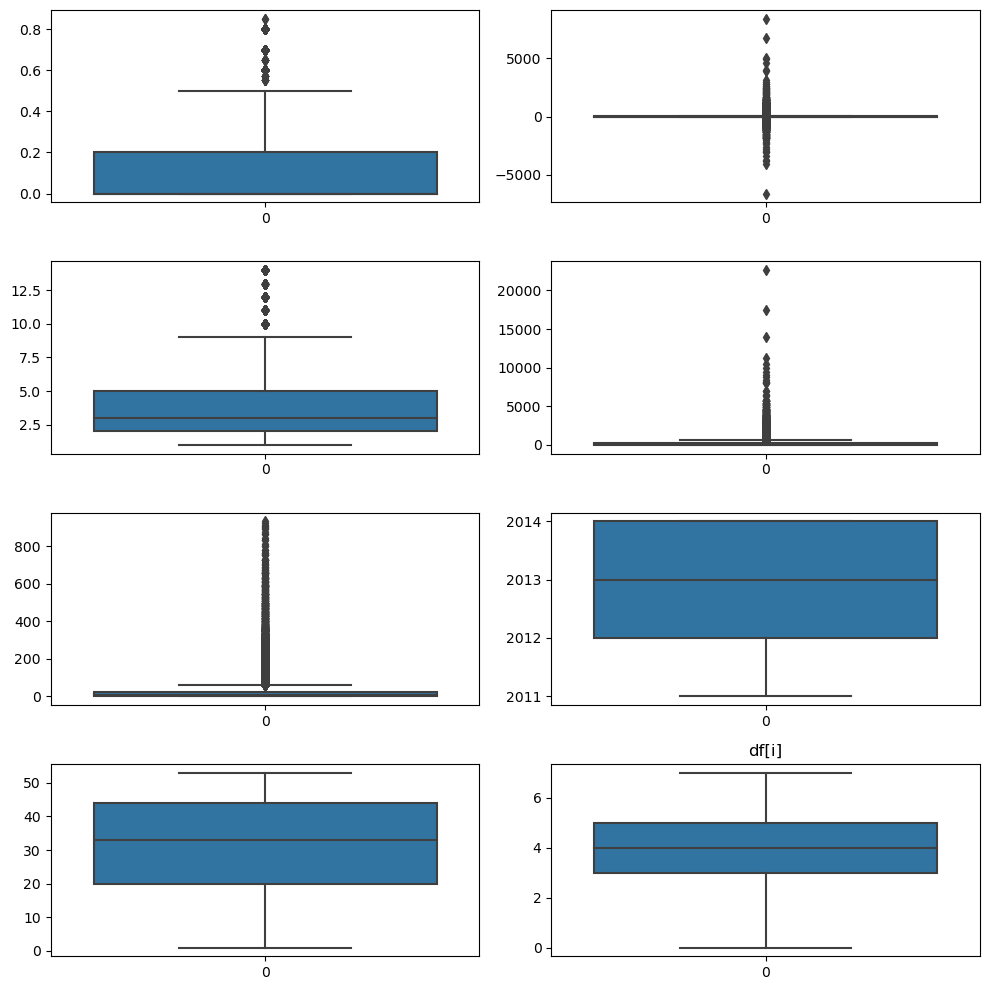

In [29]:
fig, ax= plt.subplots(4,2, figsize=(10,10))
cols=list(df.select_dtypes(include=np.number).columns)
print(cols)
for i, subplot in zip(cols, ax.flatten()):
    sns.boxplot(df[i], ax=subplot)
    plt.title('df[i]')

plt.tight_layout()
plt.show()

['Discount', 'Profit', 'Quantity', 'Sales', 'Shipping_Cost', 'Year', 'weeknum', 'Ship_Order_Date', 'Month']


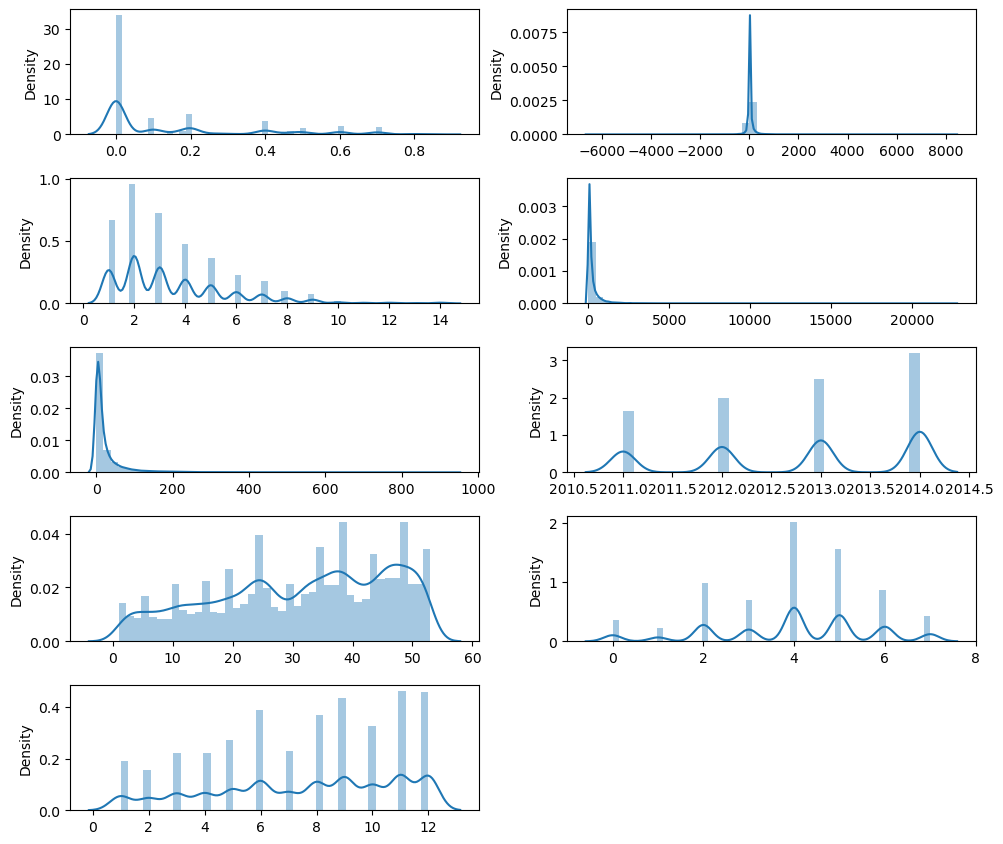

In [30]:
cols  = list(df.select_dtypes(include=np.number).columns)
print(cols)
plt.figure(figsize = (10,10))
for i,j in enumerate(cols):
    plt.subplot(6,2,i+1)
    sns.distplot(x=df[j])
plt.tight_layout()
plt.show()

In [31]:
df1=df.select_dtypes(include='O')
for i in range(len(df1.columns)):
    j=df1.columns[i]
    print(len(df1[j].unique()),'-',j)
    #print(df1[j].value_counts())

3 - Category
3636 - City
147 - Country
4873 - Customer_ID
795 - Customer_Name
7 - Market
25035 - Order_ID
4 - Order_Priority
10292 - Product_ID
3788 - Product_Name
13 - Region
3 - Segment
4 - Ship_Mode
1094 - State
17 - Sub_Category
6 - Market2


# Distributions on categorical variables

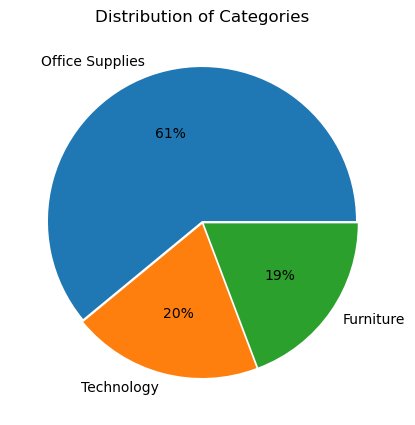

In [32]:
plt.pie(data=df,x=df['Category'].value_counts(),labels=df['Category'].value_counts().keys(),autopct='%.0f%%',explode=[0.01,0.01,0.01])
plt.title("Distribution of Categories")
plt.show()

* Office Supplies has more than 60% in the store , and techology and furniture nearly occupies 20% each in the store

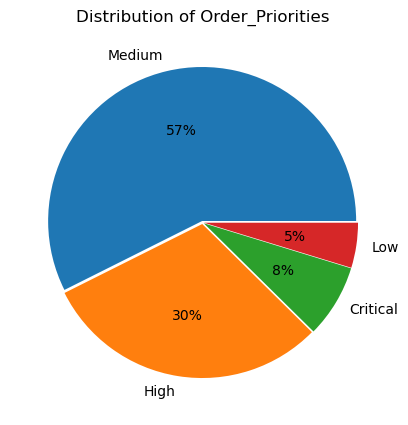

In [33]:
plt.pie(data=df,x=df['Order_Priority'].value_counts(),labels=df['Order_Priority'].value_counts().keys(),autopct='%.0f%%',explode=[0.01,0.01,0.01,0.01])
plt.title("Distribution of Order_Priorities")
plt.show()

* In the Order Priorities , Medium has more than 50% in the store and high priority has 30% 

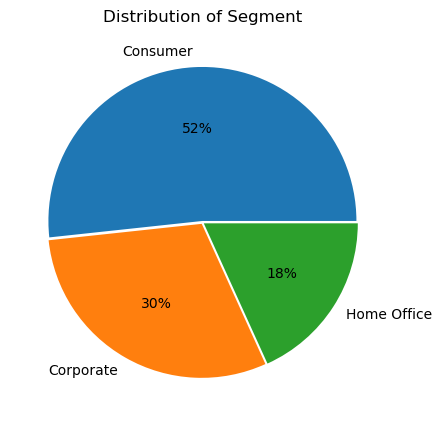

In [34]:
plt.pie(data=df,x=df['Segment'].value_counts(),labels=df['Segment'].value_counts().keys(),autopct='%.0f%%',explode=[0.01,0.01,0.01])
plt.title("Distribution of Segment")
plt.show()

* 50% are consumers who are purchasing in the store
* 30% of the segment are corporate 
* 20% of the segment are Home Office 

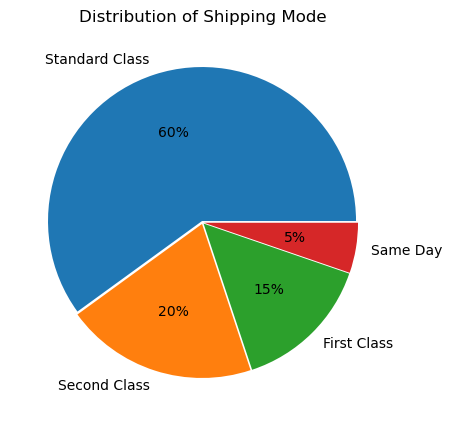

In [35]:
plt.pie(data=df,x=df['Ship_Mode'].value_counts(),labels=df['Ship_Mode'].value_counts().keys(),autopct='%.0f%%',explode=[0.01,0.01,0.01,0.01])
plt.title("Distribution of Shipping Mode")
plt.show()

* Nearly 60% of the people are using Standard shipment mode
* Only 5% of the people are using Same Day shipment mode


# Bivariate Analysis

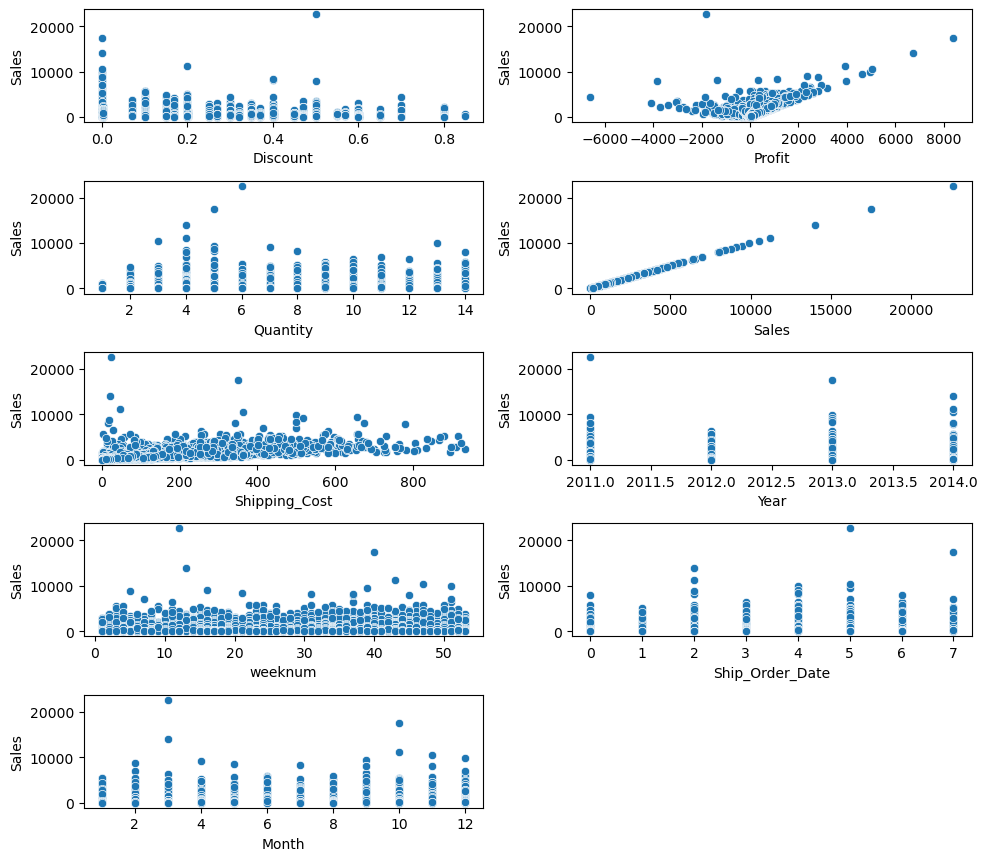

In [36]:
plt.figure(figsize=(10,10))
cols  = list(df.select_dtypes(include=np.number).columns)
for i,j in enumerate(cols):
    plt.subplot(6,2,i+1)
    sns.scatterplot(x=df[j],y=df.Sales)
plt.tight_layout()
plt.show()

* There is relationship between Profit and Sales

# PLOTS

<Figure size 2000x800 with 0 Axes>

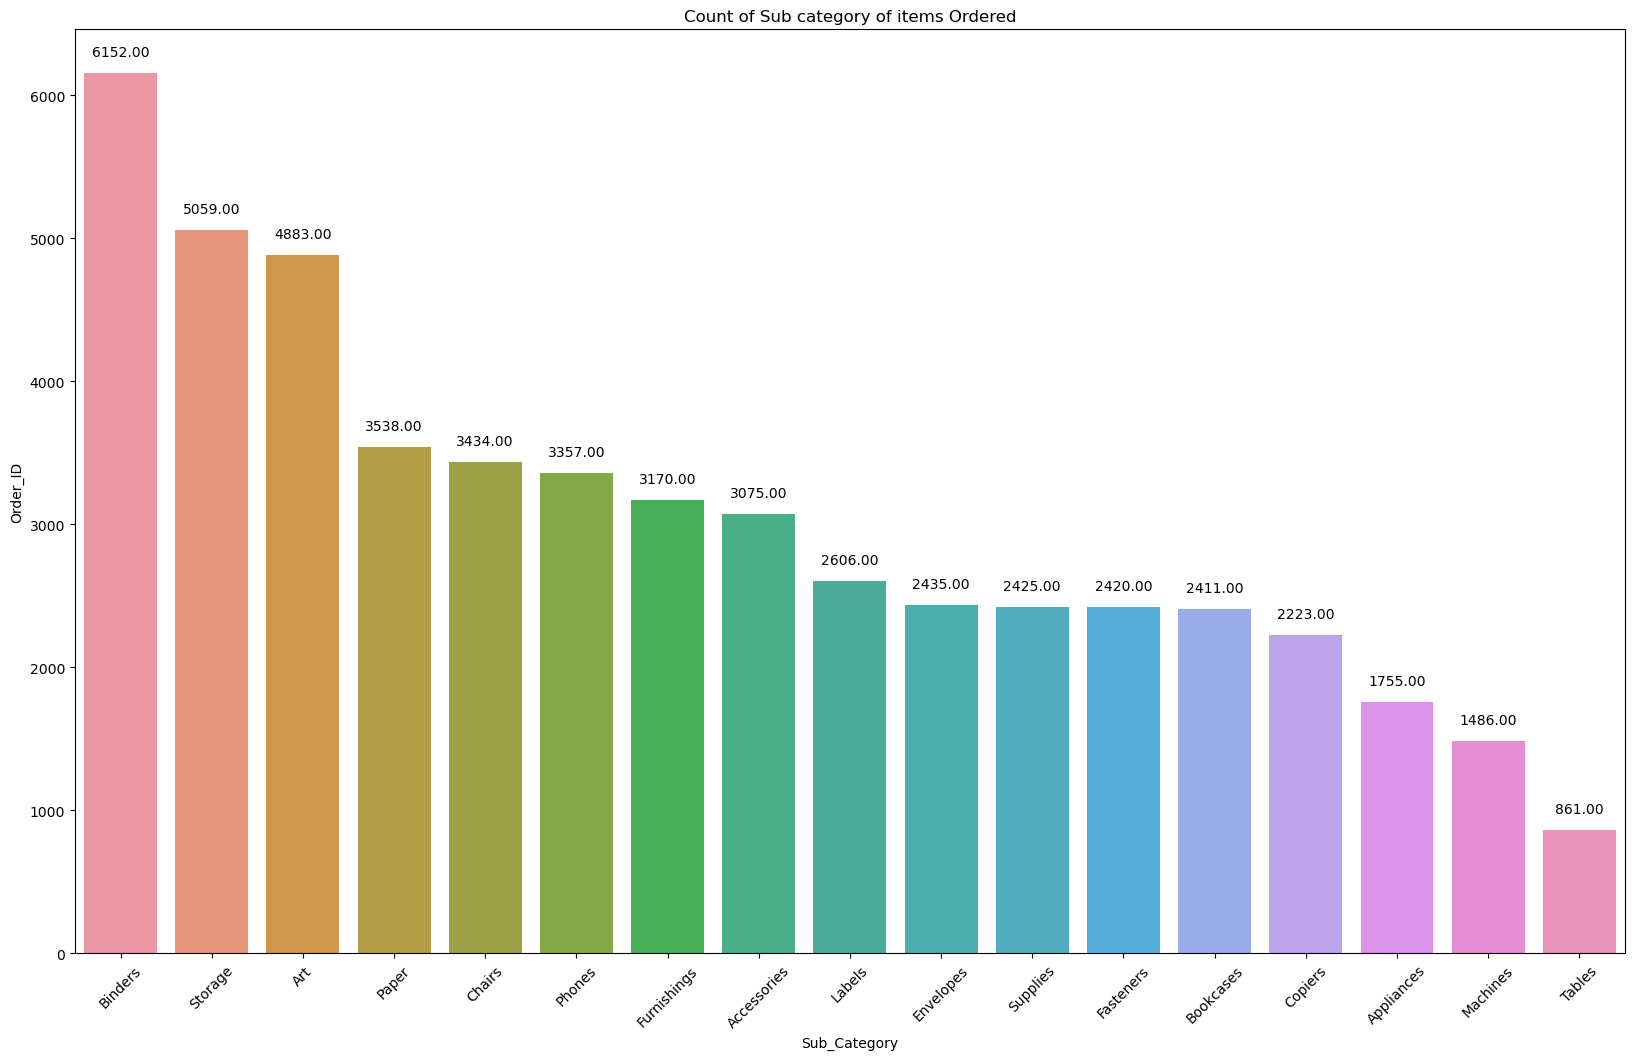

In [37]:
df_c = df.groupby(['Sub_Category'],as_index=False).agg('count')[['Sub_Category','Order_ID']].sort_values(['Order_ID'],ascending=False)
plt.figure(figsize=(20,8))
plt.figure(figsize=(20,12))
a = sns.barplot(data=df_c,x='Sub_Category',y='Order_ID')
plt.xticks(rotation=45)
plt.title("Count of Sub category of items Ordered")
#a.set(frame_on=False)
plt.bar_label(a.containers[0], fmt='%.02f',padding=10.0)
#plt.tight_layout()
plt.show()

* Tables is the least no. of orders ordered by people in the sub Category

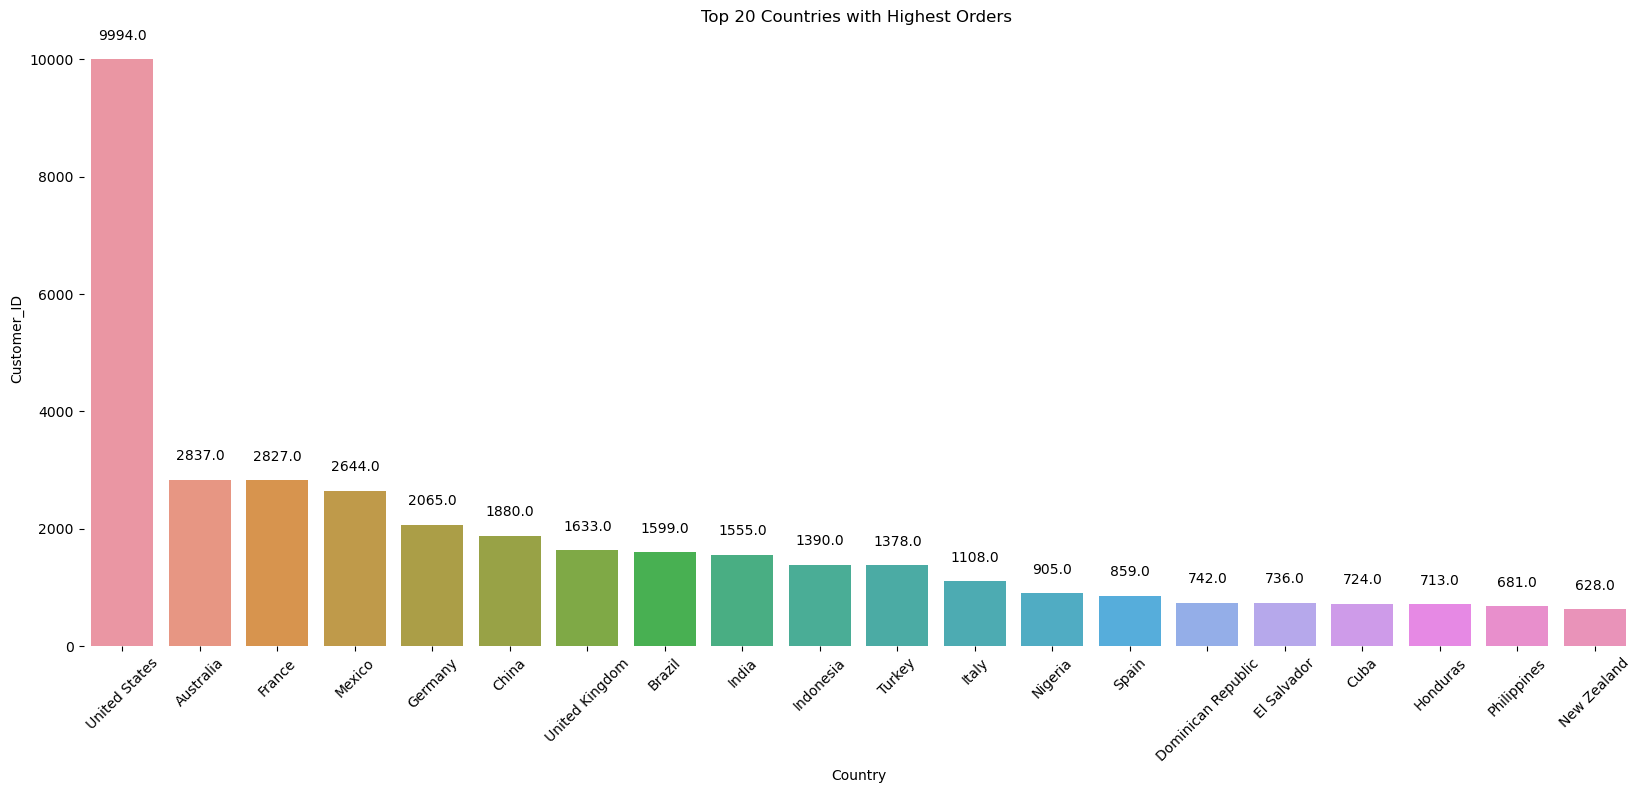

In [38]:
df_t = df.groupby(['Country'],as_index=False).agg('count')[['Country','Customer_ID']].sort_values(['Customer_ID'],ascending=False)
plt.figure(figsize=(20,8))
a = sns.barplot(data=df_t.head(20),x='Country',y='Customer_ID')
plt.xticks(rotation=45)
plt.title("Top 20 Countries with Highest Orders ")
a.set(frame_on=False)
plt.bar_label(a.containers[0], fmt='%.1f',padding=12.0)
plt.show()

* US tops the chart with highest number of orders, with NewZealand the least number of orders

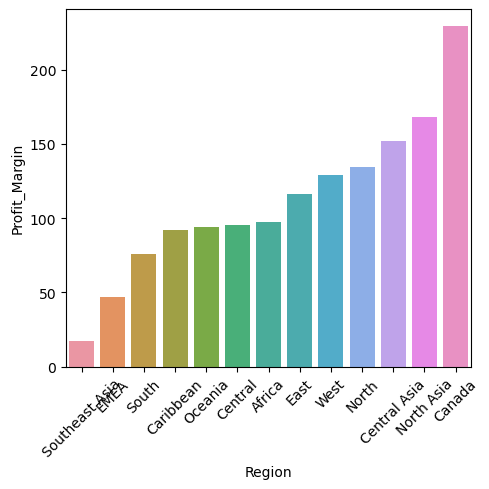

In [39]:
data_Region = pd.DataFrame()
data_Region['Sales'] =  df.groupby('Region')['Sales'].sum()/sum(df.groupby('Region')['Sales'].sum())
data_Region['Profit'] = df.groupby('Region')['Profit'].sum()/sum(df.groupby('Region')['Profit'].sum())
data_Region['Profit_Margin'] = (data_Region['Profit'] / data_Region['Sales'])*100
data_Region = data_Region.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Region.index,y=data_Region.Profit_Margin)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Canada has the highest profit margin and Southest Asia being the least in the table

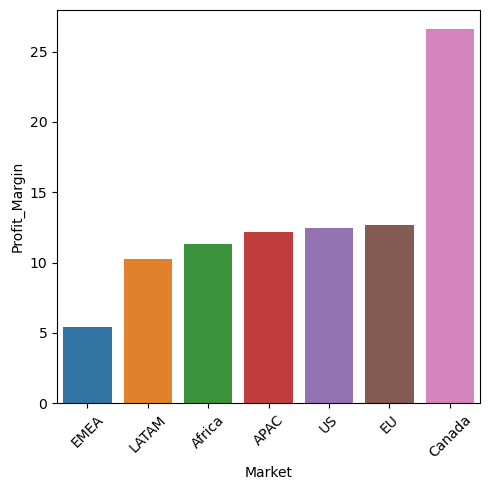

In [40]:
data_Market = pd.DataFrame()
data_Market['Sales'] =  df.groupby('Market')['Sales'].mean()
data_Market['Profit'] = df.groupby('Market')['Profit'].mean()
data_Market['Profit_Margin'] = (data_Market['Profit'] / data_Market['Sales'])*100
data_Market = data_Market.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Market.index,y=data_Market.Profit_Margin)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Canada has the highest profit margin and the least comes EMEA 
* Other countries have simialar average

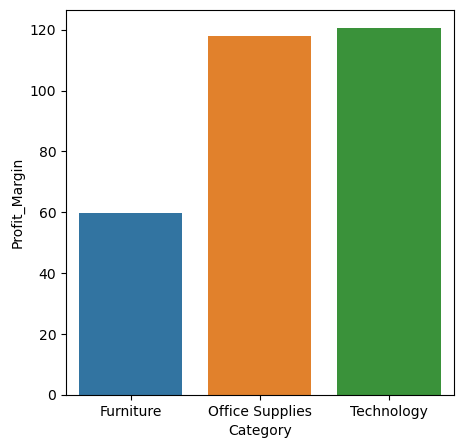

In [41]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df.groupby('Category')['Sales'].sum()/sum(df.groupby('Category')['Sales'].sum())
data_Category['Profit'] = df.groupby('Category')['Profit'].sum()/sum(df.groupby('Category')['Profit'].sum())
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

* Among the categories Furniture has the least profit margin, office Supplies and Technology are almost the same  

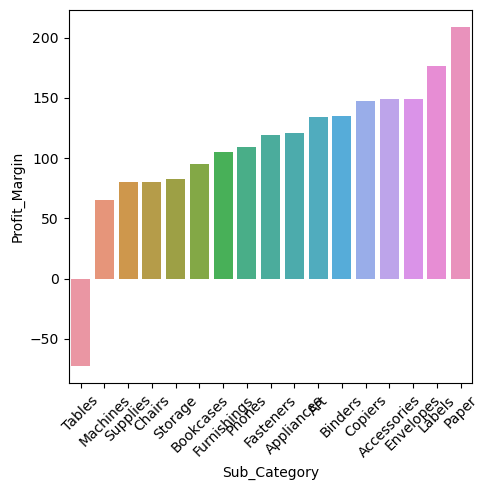

In [42]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] =  df.groupby('Sub_Category')['Sales'].sum()/sum(df.groupby('Sub_Category')['Sales'].sum())
data_Sub_Category['Profit'] = df.groupby('Sub_Category')['Profit'].sum()/sum(df.groupby('Sub_Category')['Profit'].sum())
data_Sub_Category['Profit_Margin'] = data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* Tables are the least in terms of Profit Margin and paper tops the chart

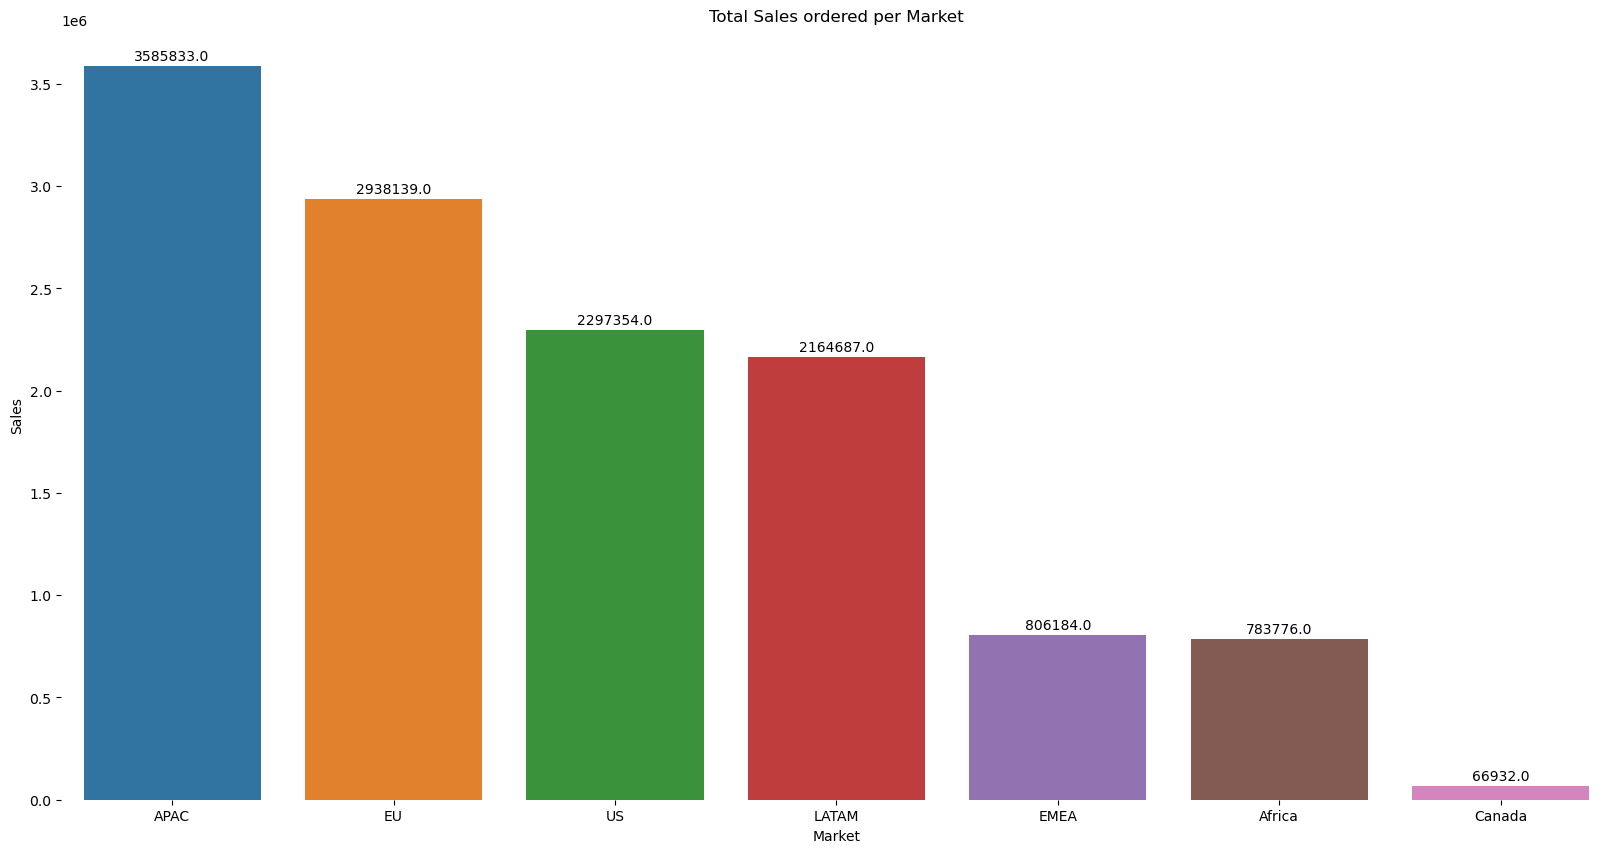

In [43]:
df_sales = df.groupby(['Market'])['Sales'].agg('sum').reset_index().sort_values(['Sales'],ascending=False)
plt.figure(figsize=(20,10))
a = sns.barplot(data=df_sales,x='Market',y="Sales")
# plt.yticks(rotation=45)
plt.title("Total Sales ordered per Market")
a.set(frame_on=False)
plt.bar_label(a.containers[0], fmt='%.1f',padding=2.0)
plt.show()

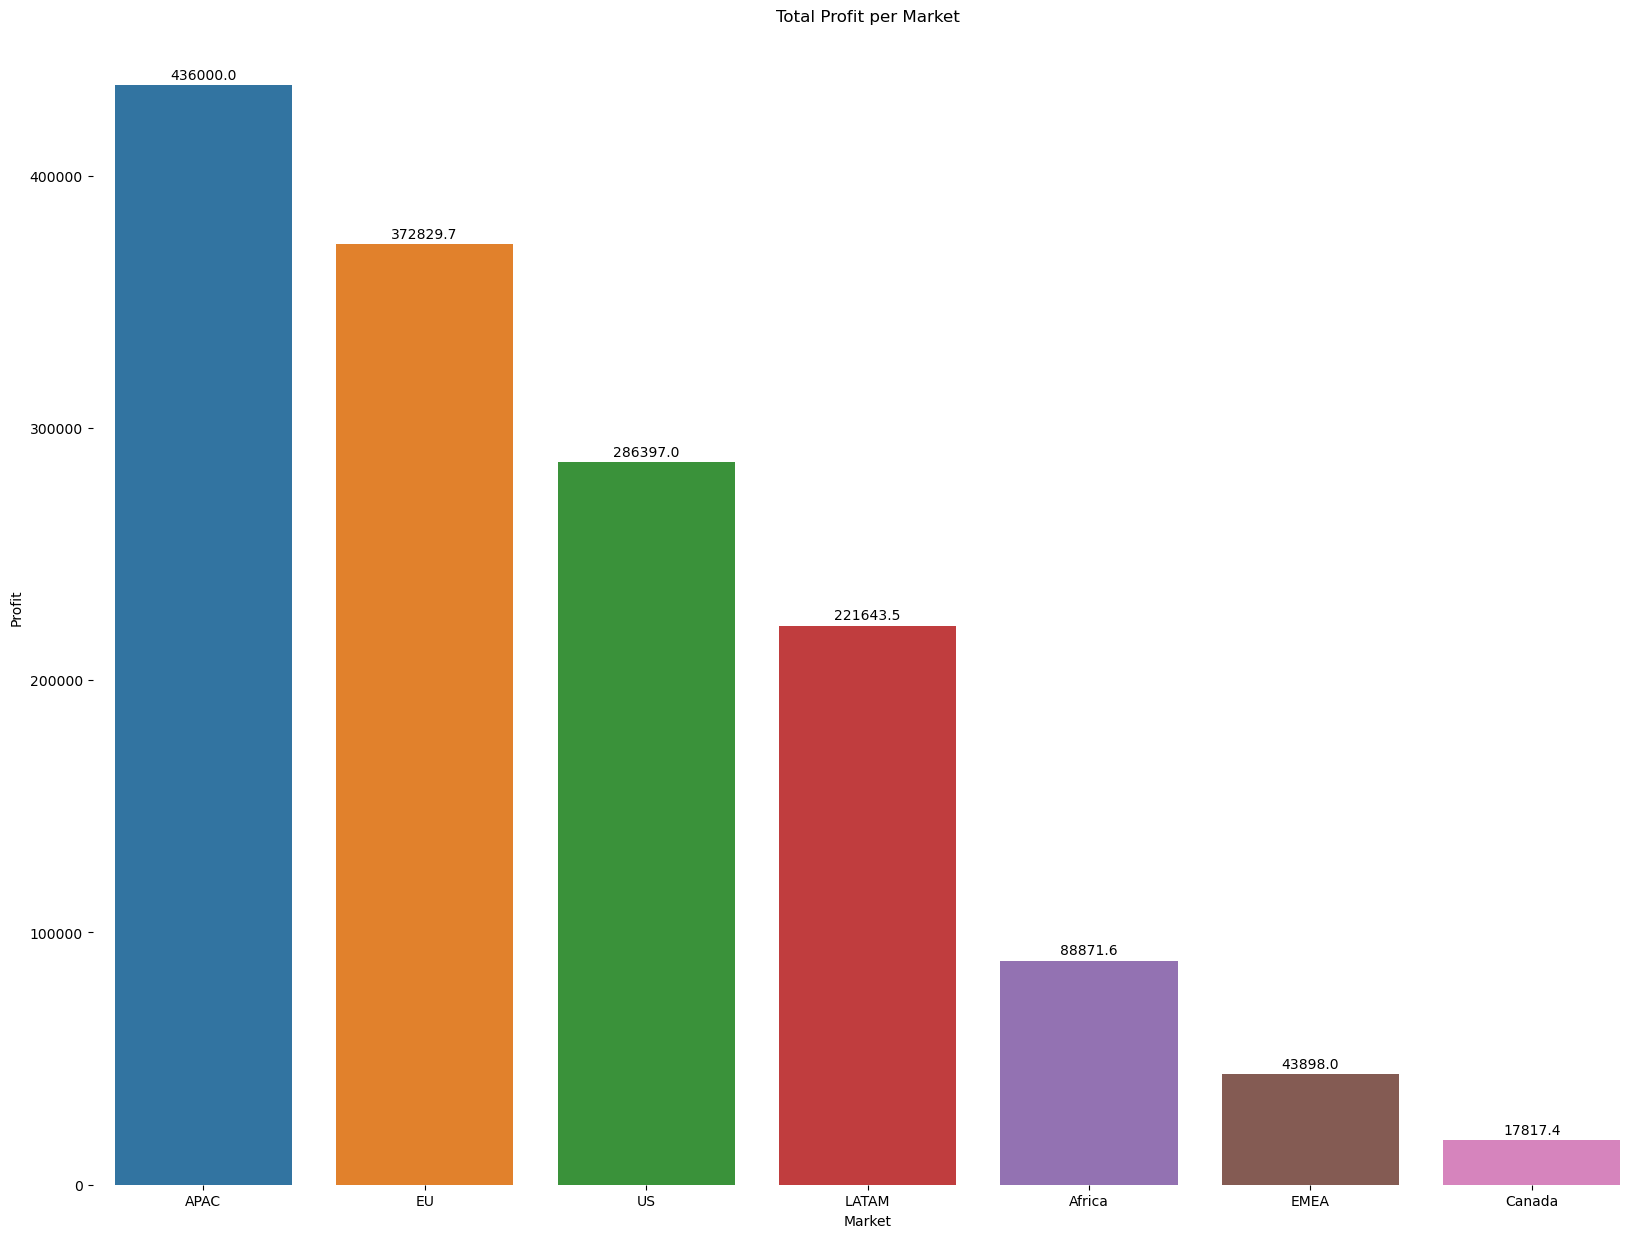

In [44]:
df_sales = df.groupby(['Market'])['Profit'].agg('sum').reset_index().sort_values(['Profit'],ascending=False)
plt.figure(figsize=(20,15))
a = sns.barplot(data=df_sales,x='Market',y="Profit")
# plt.yticks(rotation=45)
plt.title("Total Profit per Market")
a.set(frame_on=False)
plt.bar_label(a.containers[0], fmt='%.1f',padding=2.0)
plt.show()

* Canada has lowest Sales and Profit among the other market

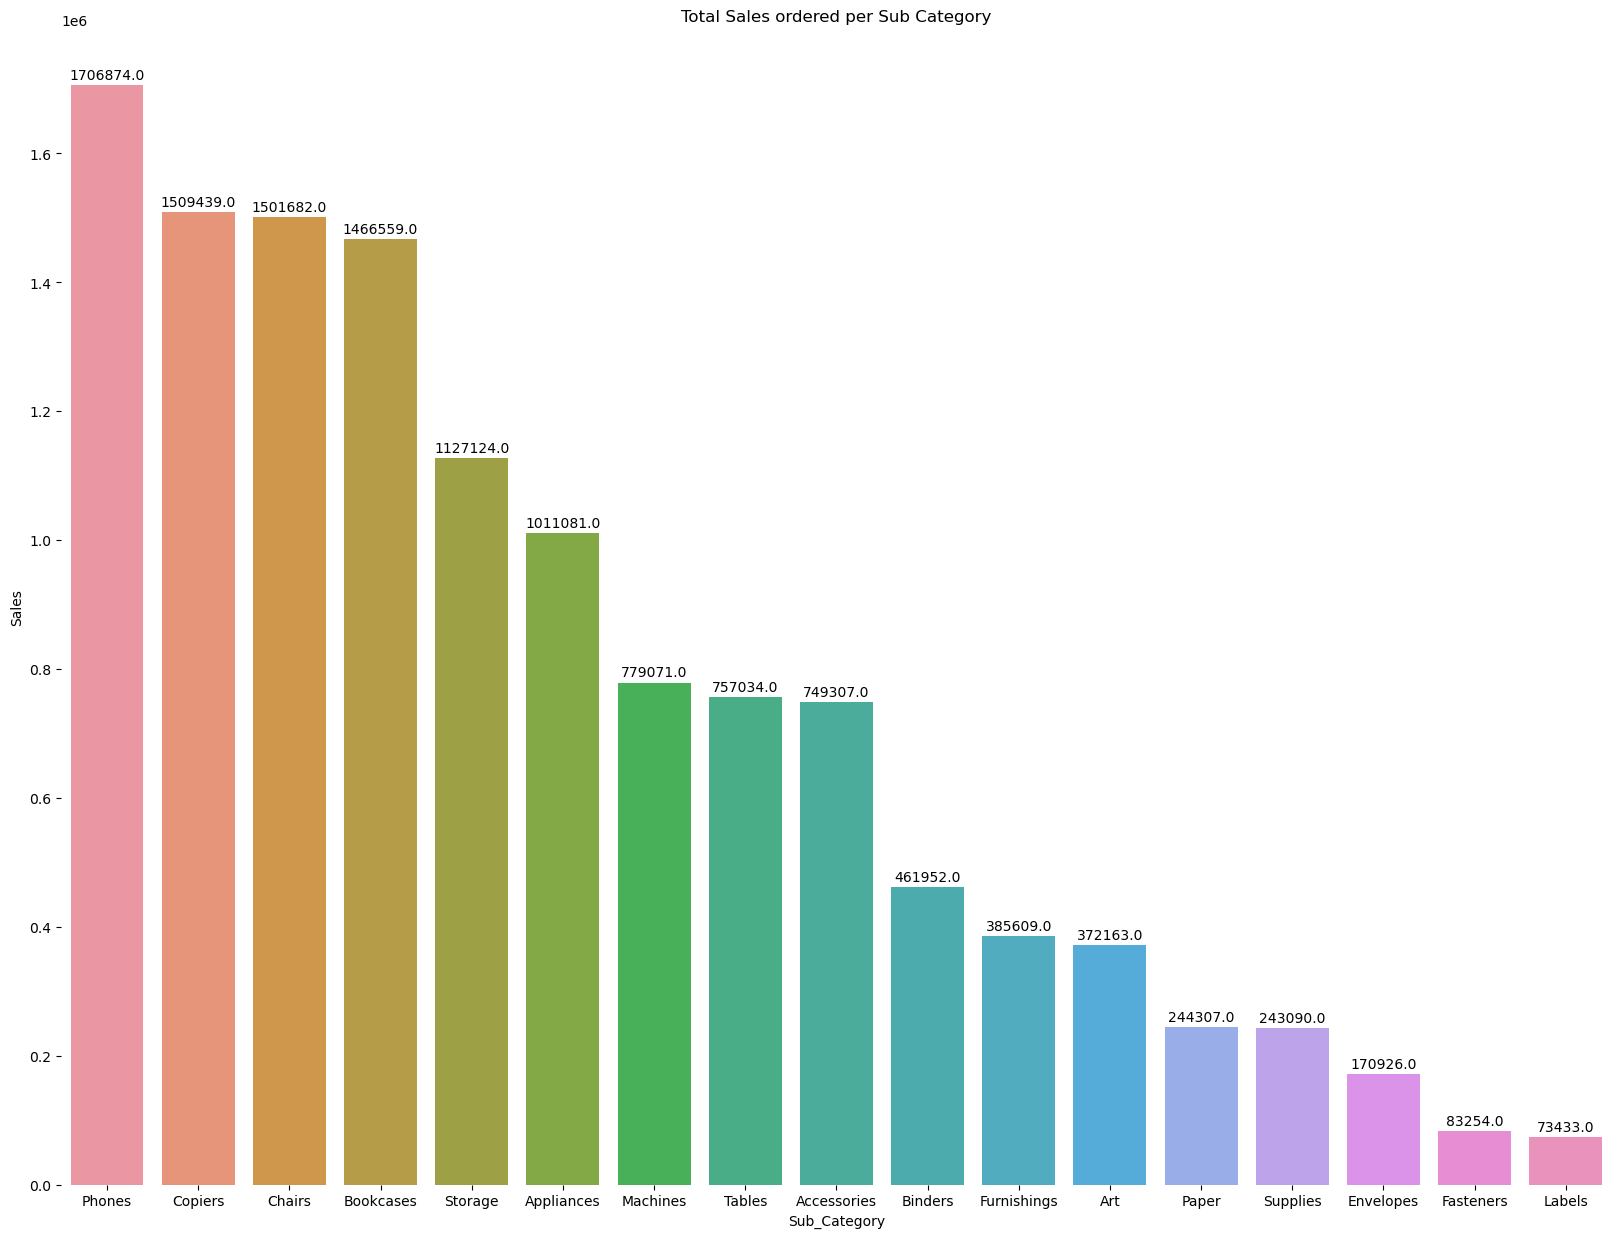

In [45]:
df_sales = df.groupby(['Sub_Category'])['Sales'].agg('sum').reset_index().sort_values(['Sales'],ascending=False)
plt.figure(figsize=(20,15))
a = sns.barplot(data=df_sales,x='Sub_Category',y="Sales")
# plt.yticks(rotation=45)
plt.title("Total Sales ordered per Sub Category")
a.set(frame_on=False)
plt.bar_label(a.containers[0], fmt='%.1f',padding=2.0)
plt.show()

* Labels has lowest Sales in Sub-Category level

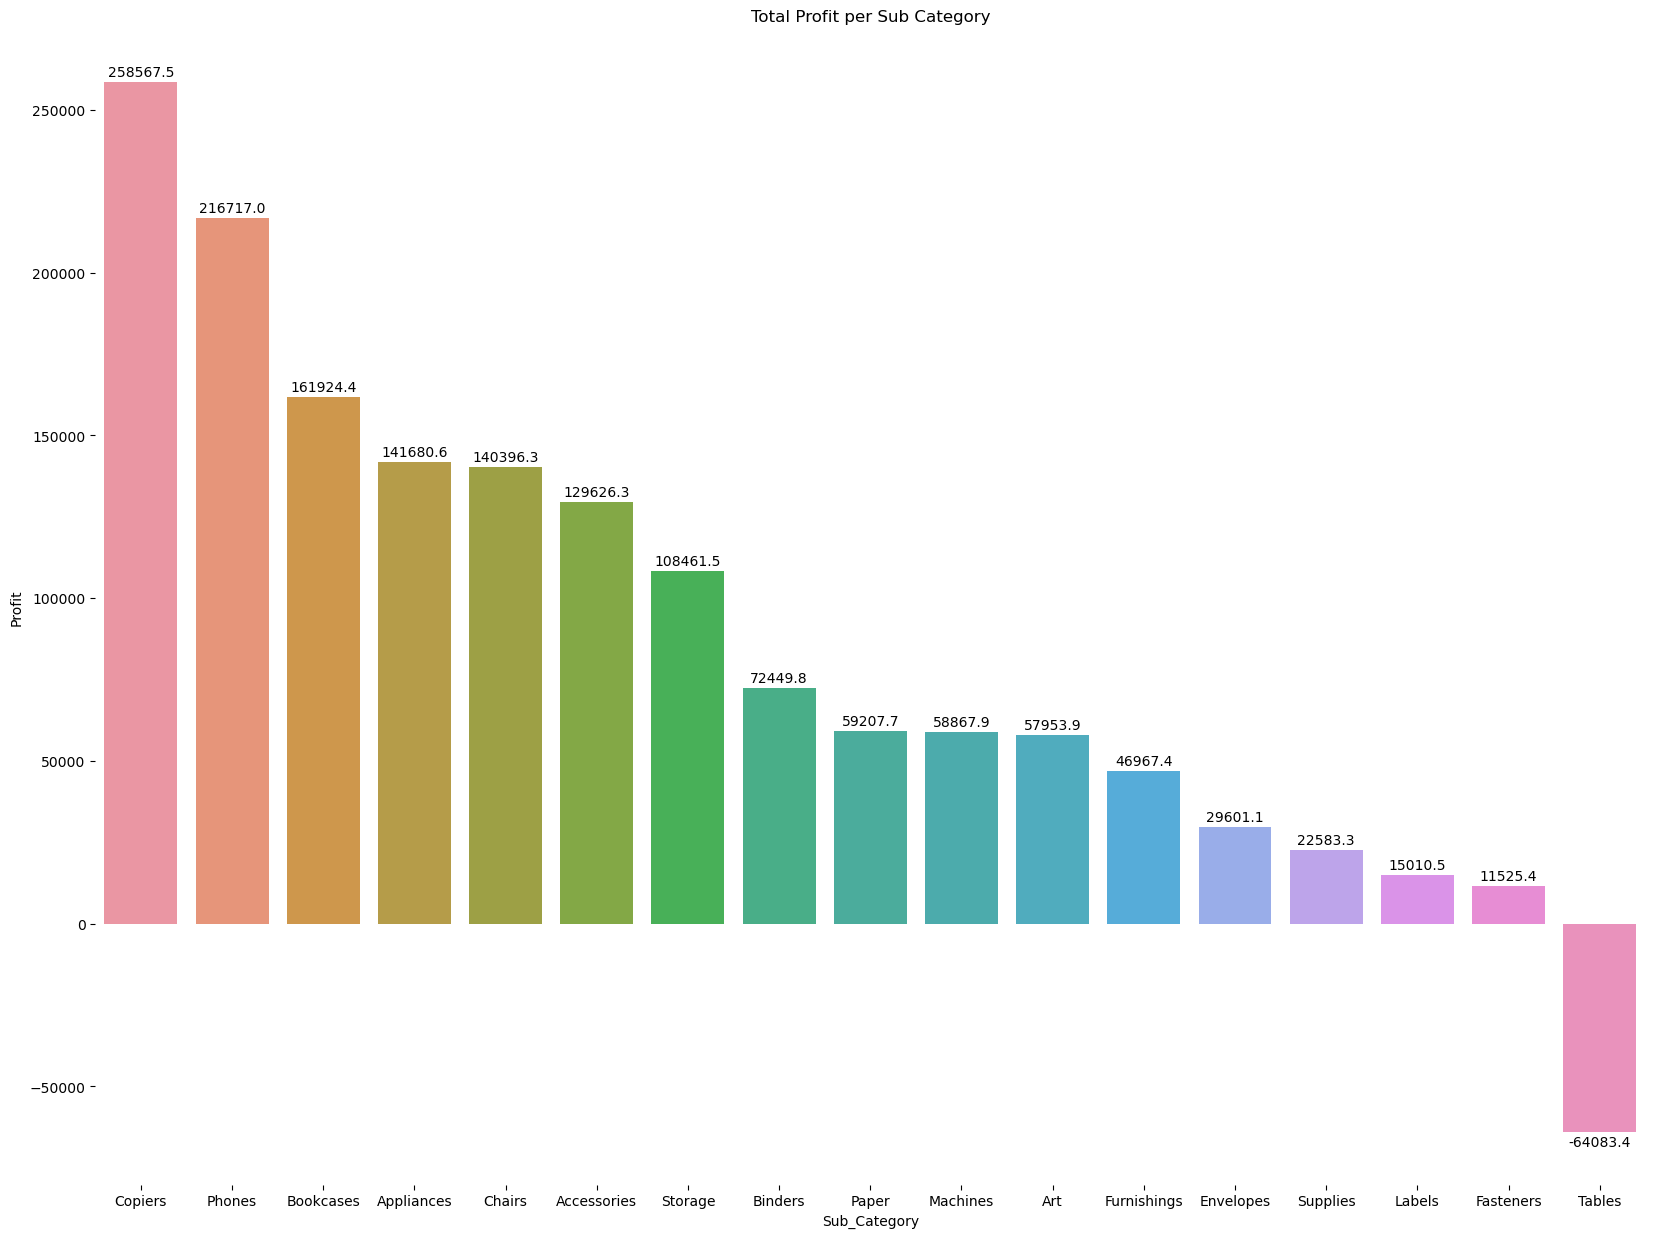

In [46]:
df_sales = df.groupby(['Sub_Category'])['Profit'].agg('sum').reset_index().sort_values(['Profit'],ascending=False)
plt.figure(figsize=(20,15))
a = sns.barplot(data=df_sales,x='Sub_Category',y="Profit")
# plt.yticks(rotation=45)
plt.title("Total Profit per Sub Category")
a.set(frame_on=False)
plt.bar_label(a.containers[0], fmt='%.1f',padding=2.0)
plt.show()

* Tables has high sales but has negative profit (which means loss to the store) , so they can Raise the price of the Tables

# MARKET Level Analysis

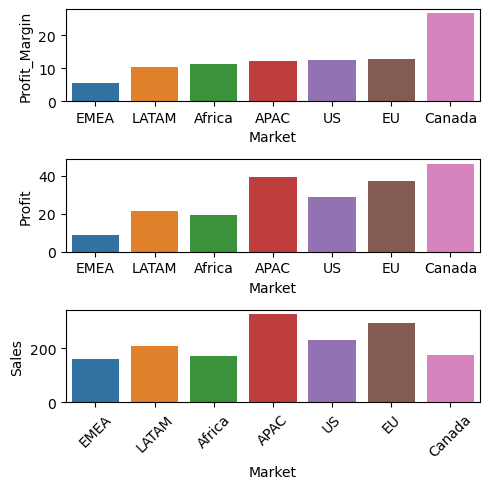

In [47]:
#plt.rcParams['figure.figsize'] = [5,10]
data_Market = pd.DataFrame()
data_Market['Sales'] =  df.groupby('Market')['Sales'].mean()
data_Market['Profit'] = df.groupby('Market')['Profit'].mean()
data_Market['Profit_Margin'] = (data_Market['Profit'] / data_Market['Sales'])*100
data_Market = data_Market.sort_values('Profit_Margin',ascending=True)
plt.subplot(3,1,1)
sns.barplot(x=data_Market.index,y=data_Market.Profit_Margin)
plt.subplot(3,1,2)
sns.barplot(x=data_Market.index,y=data_Market.Profit)
plt.subplot(3,1,3)
sns.barplot(x=data_Market.index,y=data_Market.Sales)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

* We can see that EMEA Market has high sales but yield low profit , it can be due to high Discount , So further analysis are done to detect the reason.

* And Canada has the low sales but high profit , which leads to high profit margin , it can be due to very low discounts So further analysis are done to detect the reason

# MARKET-- US 

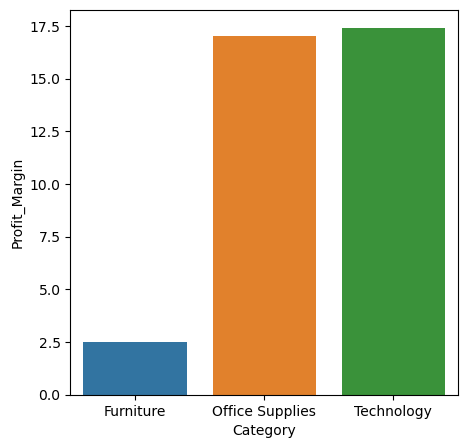

In [48]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df[df.Market == 'US'].groupby('Category')['Sales'].mean()
data_Category['Profit'] = df[df.Market == 'US'].groupby('Category')['Profit'].mean()
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

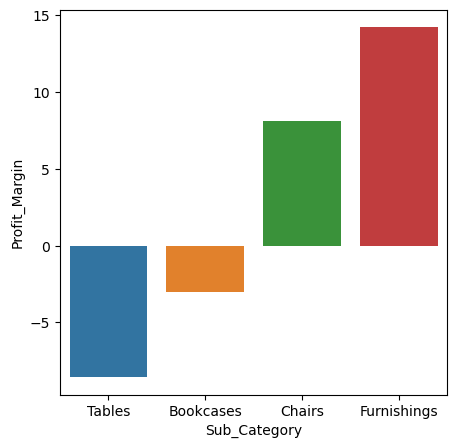

In [49]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'US') & (df.Category == 'Furniture')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'US') & (df.Category == 'Furniture')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Discount should be reduced to increase the Profit for Tables and BookCases category
* For shipping Cost , we can give 50% discount on 6th order to increase the sales
* We can the increase the price of the Tables and BookCases Products
* And it we can sell like a combo of Tables and Chairs , BookCases and Furnishings to increase the sales and gain the profit
* ⁠It can be a Clearance sale
*  ⁠Maybe due to bad quality of tables and bookcases

# MARKET-- CANADA

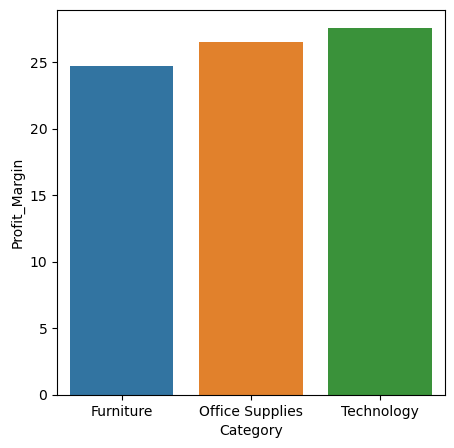

In [50]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df[df.Market == 'Canada'].groupby('Category')['Sales'].mean()
data_Category['Profit'] = df[df.Market == 'Canada'].groupby('Category')['Profit'].mean()
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

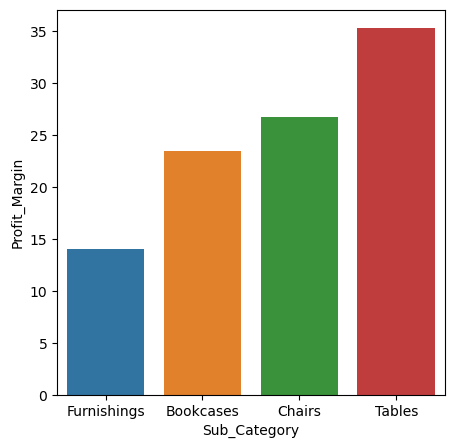

In [51]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'Canada') & (df.Category == 'Furniture')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'Canada') & (df.Category == 'Furniture')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Furnishings has only half of the Tables Profit Margin.

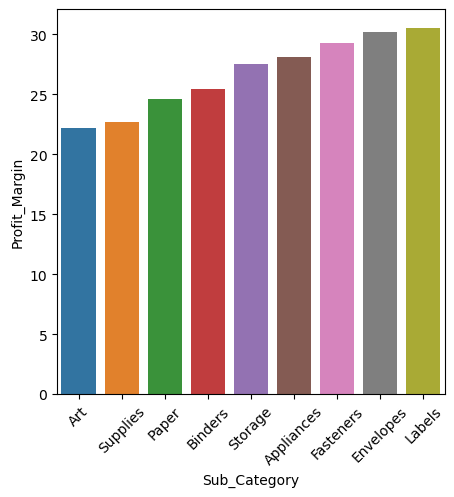

In [52]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'Canada') & (df.Category == 'Office Supplies')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'Canada') & (df.Category == 'Office Supplies')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.xticks(rotation=45) 
plt.show()

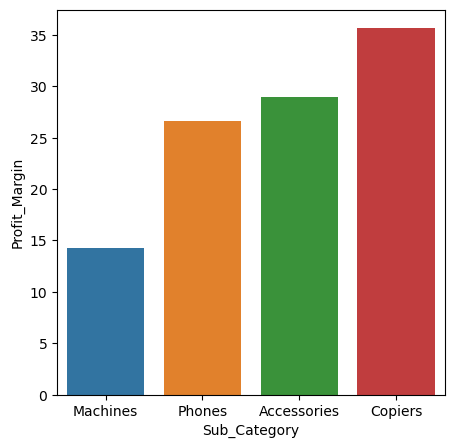

In [53]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'Canada') & (df.Category == 'Technology')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'Canada') & (df.Category == 'Technology')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Machines has only half of the Copiers Profit Margin.

# MARKET --EU EUROPEAN UNION

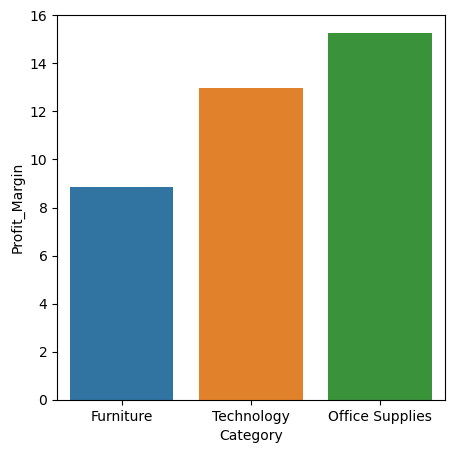

In [54]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df[df.Market == 'EU'].groupby('Category')['Sales'].mean()
data_Category['Profit'] = df[df.Market == 'EU'].groupby('Category')['Profit'].mean()
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

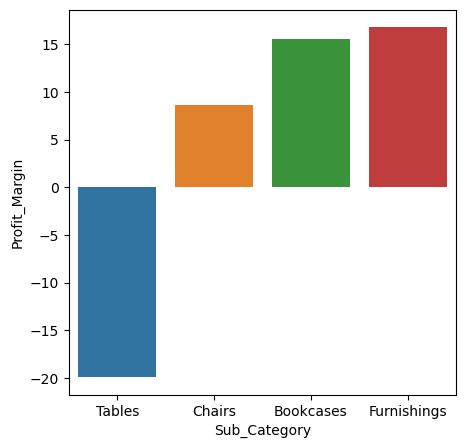

In [55]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'EU') & (df.Category == 'Furniture')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'EU') & (df.Category == 'Furniture')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Discount should be reduced to increase the Profit for Tables 
* For shipping Cost , we can give 50% discount on 6th order to increase the sales
* We can the increase the price of the Tables 
* And it we can sell like a combo of Tables with other products to increase the sales and gain the profit
* It can be a Clearance sale
* Maybe due to bad quality of tables

# MARKET--AFRICA 

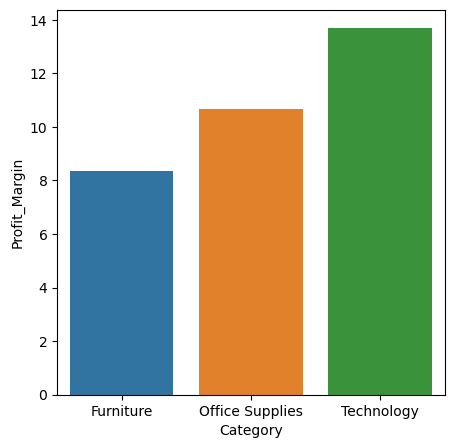

In [56]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df[df.Market == 'Africa'].groupby('Category')['Sales'].mean()
data_Category['Profit'] = df[df.Market == 'Africa'].groupby('Category')['Profit'].mean()
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

* Furniture has the lowest Profit Margin

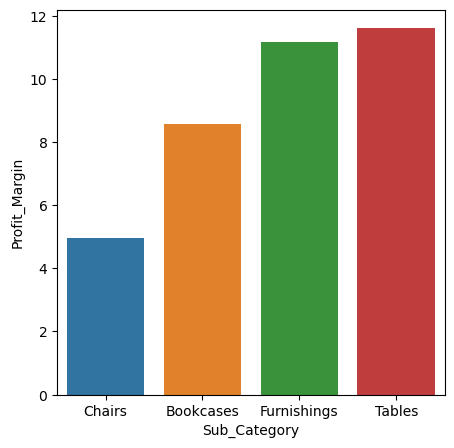

In [57]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'Africa') & (df.Category == 'Furniture')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'Africa') & (df.Category == 'Furniture')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* In most of markets Tables has the lowest Profit Margin but in Africa Tables has highest Profit Margin
* And Chairs has lowest Profit Margin

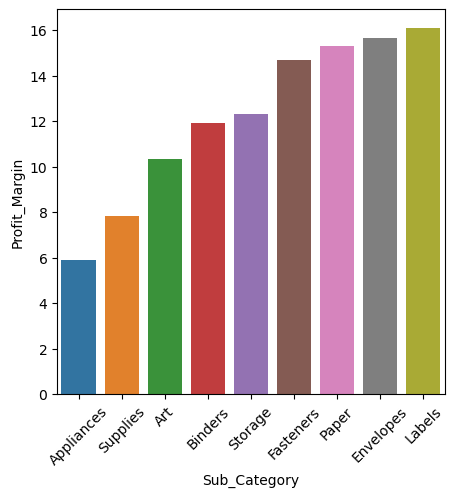

In [58]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'Africa') & (df.Category == 'Office Supplies')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'Africa') & (df.Category == 'Office Supplies')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.xticks(rotation=45) 
plt.show()

* Appliances has the lowest Profit Margin , only one-third of Labels Profit Margin

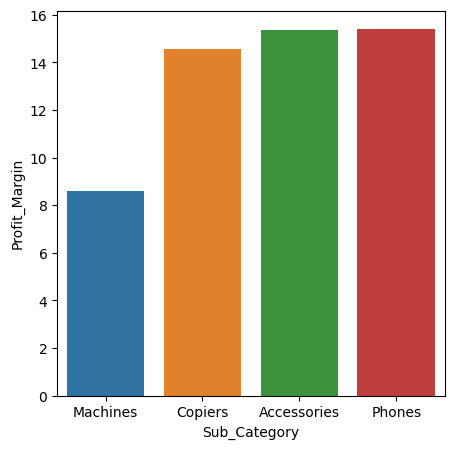

In [59]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'Africa') & (df.Category == 'Technology')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'Africa') & (df.Category == 'Technology')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Compared to all other sub categories in Technology , Machines has the lowest Profit Margin

# Market -- EMEA

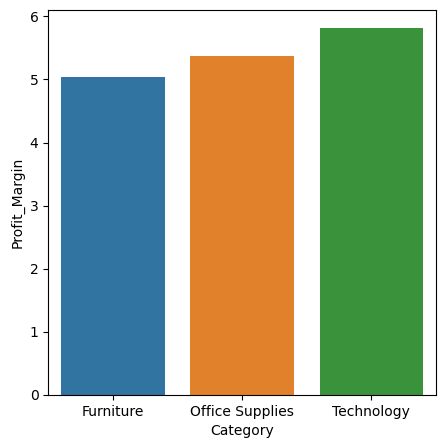

In [60]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df[df.Market == 'EMEA'].groupby('Category')['Sales'].mean()
data_Category['Profit'] = df[df.Market == 'EMEA'].groupby('Category')['Profit'].mean()
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

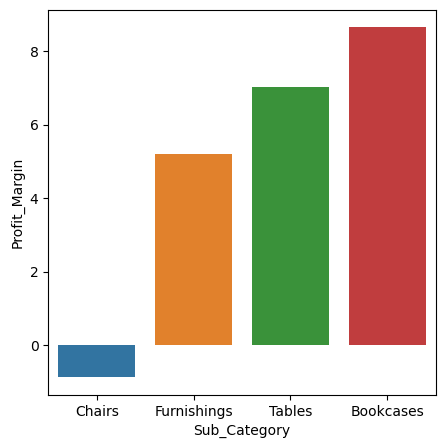

In [61]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'EMEA') & (df.Category == 'Furniture')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'EMEA') & (df.Category == 'Furniture')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Discount should be reduced to increase the Profit for chairs
* For shipping Cost , we can give 50% discount on 6th order to increase the sales
* We can the increase the price of the chairs 
* And it we can sell like a combo of chairs with other products to increase the sales and gain the profit 
* It can be a Clearance sale
* Maybe due to bad quality of chairs 

# Market-- APAC

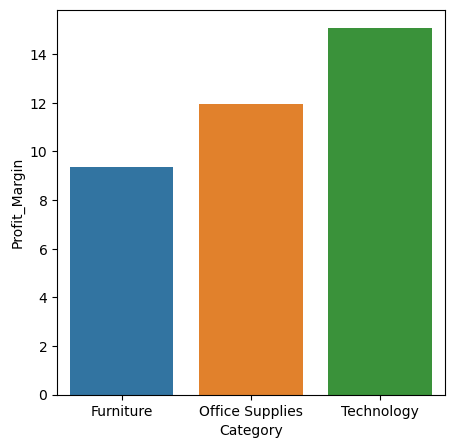

In [62]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df[df.Market == 'APAC'].groupby('Category')['Sales'].mean()
data_Category['Profit'] = df[df.Market == 'APAC'].groupby('Category')['Profit'].mean()
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

* Furniture has the lowest Profit Margin

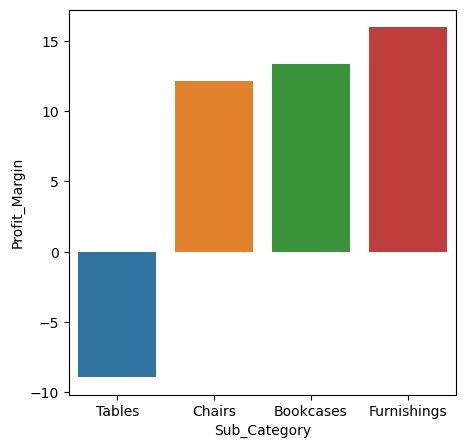

In [63]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'APAC') & (df.Category == 'Furniture')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'APAC') & (df.Category == 'Furniture')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Discount should be reduced to increase the Profit for Tables 
* For shipping Cost , we can give 50% discount on 6th order to increase the sales
* We can the increase the price of the Tables 
* And it we can sell like a combo of Tables with other products to increase the sales and gain the profit
⁠* It can be a Clearance sale
⁠* Maybe due to bad quality of tables 

# Market-- LATAM

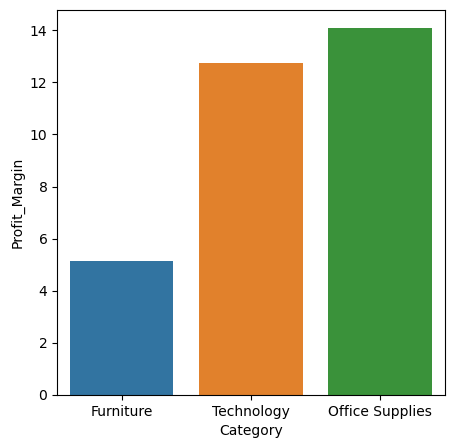

In [64]:
data_Category = pd.DataFrame()
data_Category['Sales'] = df[df.Market == 'LATAM'].groupby('Category')['Sales'].mean()
data_Category['Profit'] = df[df.Market == 'LATAM'].groupby('Category')['Profit'].mean()
data_Category['Profit_Margin'] =  data_Category['Profit'] / data_Category['Sales']*100
data_Category = data_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Category.index,y=data_Category.Profit_Margin)
plt.show()

* Furniture has the lowest Profit Margin

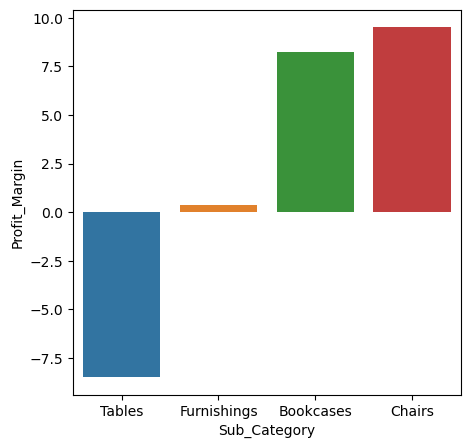

In [65]:
data_Sub_Category = pd.DataFrame()
data_Sub_Category['Sales'] = df[(df.Market == 'LATAM') & (df.Category == 'Furniture')].groupby('Sub_Category')['Sales'].mean()
data_Sub_Category['Profit'] = df[(df.Market == 'LATAM') & (df.Category == 'Furniture')].groupby('Sub_Category')['Profit'].mean()
data_Sub_Category['Profit_Margin'] =  data_Sub_Category['Profit'] / data_Sub_Category['Sales']*100
data_Sub_Category = data_Sub_Category.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Sub_Category.index,y=data_Sub_Category.Profit_Margin)
plt.show()

* Discount should be reduced to increase the Profit for Tables and Furniture category
* For shipping Cost , we can give 50% discount on 6th order to increase the sales
* We can the increase the price of the Tables and Furniture Products
* And it we can sell like a combo of Tables and Chairs , Furniture and Furnishings to increase the sales and gain the profit
* ⁠It can be a Clearance sale
*  ⁠Maybe due to bad quality of tables and Furniture

# based on segment and discount

# Us

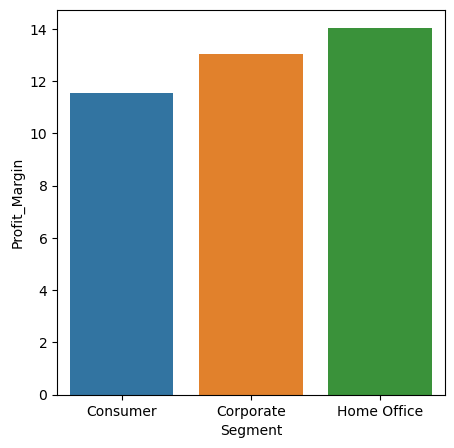

In [66]:
data_Segment = pd.DataFrame()
data_Segment['Sales'] = df[df.Market == 'US'].groupby('Segment')['Sales'].mean()
data_Segment['Profit'] = df[df.Market == 'US'].groupby('Segment')['Profit'].mean()
data_Segment['Profit_Margin'] =  data_Segment['Profit'] / data_Segment['Sales']*100
data_Segment = data_Segment.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Segment.index,y=data_Segment.Profit_Margin)
plt.show()

In [67]:
segmet_df = df [ (df.Market == 'US' ) ]

<Axes: xlabel='Category', ylabel='count'>

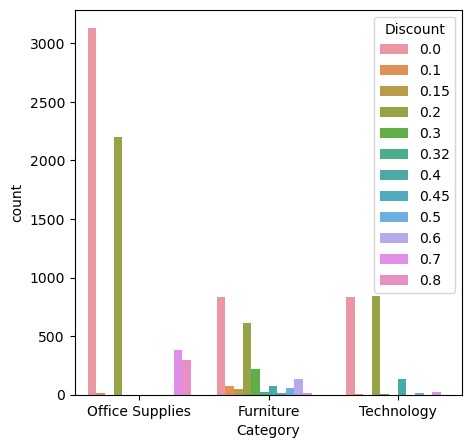

In [68]:
sns.countplot(hue=segmet_df.Discount,x = segmet_df.Category)

* for office supplies, the discount range is around 70%-80% , so we can reduce it to 30%-40%, which may increase the profit margin

<Axes: xlabel='Segment', ylabel='count'>

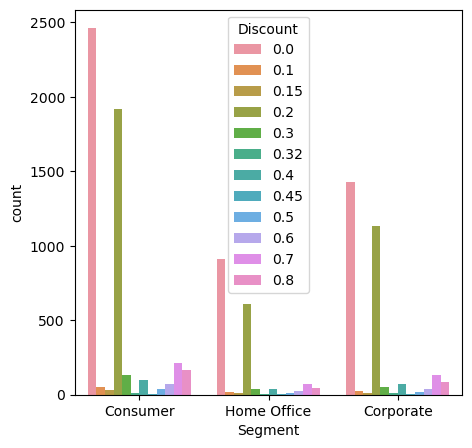

In [69]:
sns.countplot(hue=segmet_df.Discount,x = segmet_df.Segment)

* ⁠For Consumer Segmentation we can see that it has high Discount Rates and low Margin Profit Margin ,
  so we can try reducing discounts for Consumer Segments.
* ⁠And we can see 20% discounts is predominant in the discounts range , maybe we can split that into 0.10 and 
  give it to most of the products (which are selling), so we can increase the sale for all the products equally

# Canada

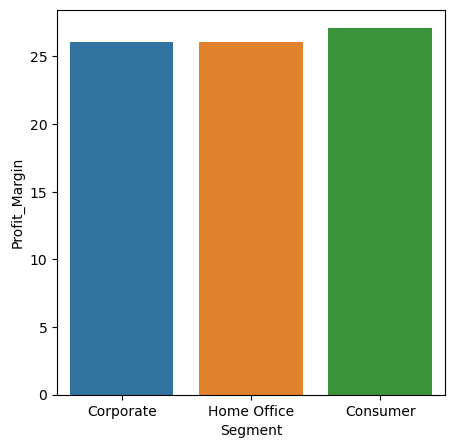

In [70]:
data_Segment = pd.DataFrame()
data_Segment['Sales'] = df[df.Market == 'Canada'].groupby('Segment')['Sales'].mean()
data_Segment['Profit'] = df[df.Market == 'Canada'].groupby('Segment')['Profit'].mean()
data_Segment['Profit_Margin'] =  data_Segment['Profit'] / data_Segment['Sales']*100
data_Segment = data_Segment.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Segment.index,y=data_Segment.Profit_Margin)
plt.show()

In [71]:
segmet_df_c = df [ (df.Market == 'Canada' ) ]

<Axes: xlabel='Category', ylabel='count'>

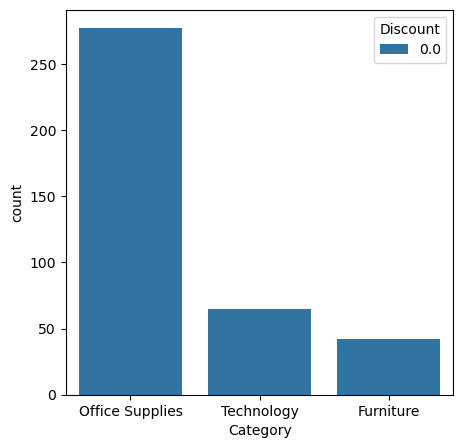

In [72]:
sns.countplot(hue=segmet_df_c.Discount,x = segmet_df_c.Category)

<Axes: xlabel='Segment', ylabel='count'>

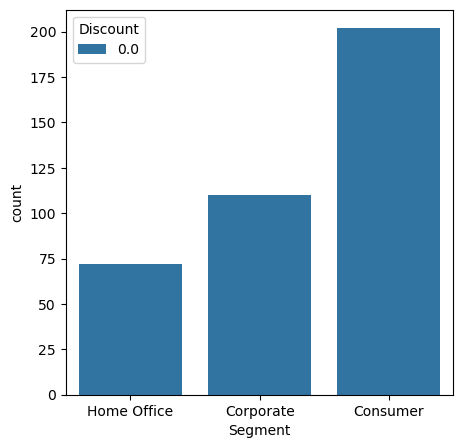

In [73]:
sns.countplot(hue=segmet_df_c.Discount,x = segmet_df_c.Segment)

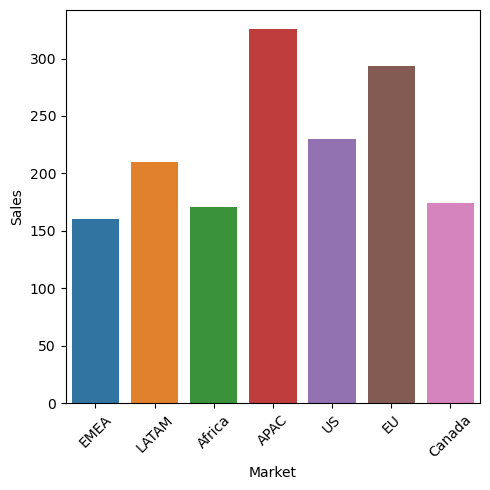

In [74]:
sns.barplot(x=data_Market.index,y=data_Market.Sales)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Axes: xlabel='Category', ylabel='Sales'>

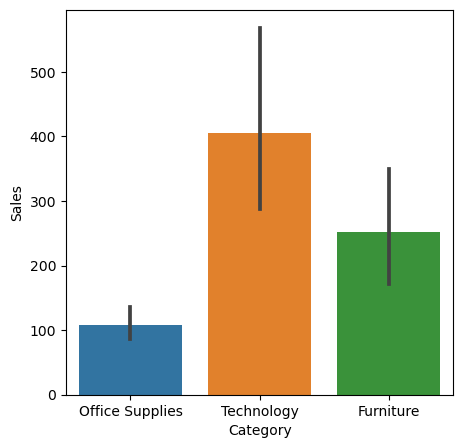

In [75]:
sns.barplot(x=segmet_df_c.Category,y=segmet_df_c.Sales)

* We can see that stores in  canada has not given any discount this can be reason for their minimum sales

* For office supplies we can give discount to increase the sales of it.

# Eu

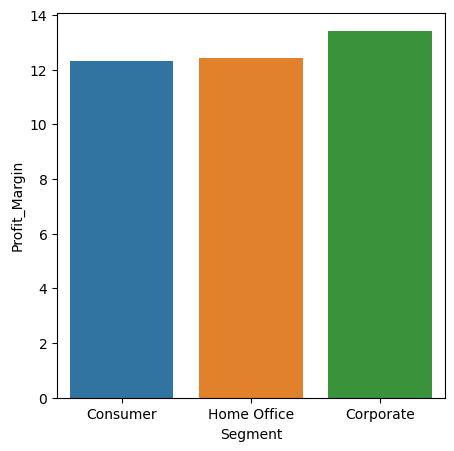

In [76]:
data_Segment = pd.DataFrame()
data_Segment['Sales'] = df[df.Market == 'EU'].groupby('Segment')['Sales'].mean()
data_Segment['Profit'] = df[df.Market == 'EU'].groupby('Segment')['Profit'].mean()
data_Segment['Profit_Margin'] =  data_Segment['Profit'] / data_Segment['Sales']*100
data_Segment = data_Segment.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Segment.index,y=data_Segment.Profit_Margin)
plt.show()

In [77]:
segmet_df_eu = df [ (df.Market == 'EU' ) ]

<Axes: xlabel='Category', ylabel='count'>

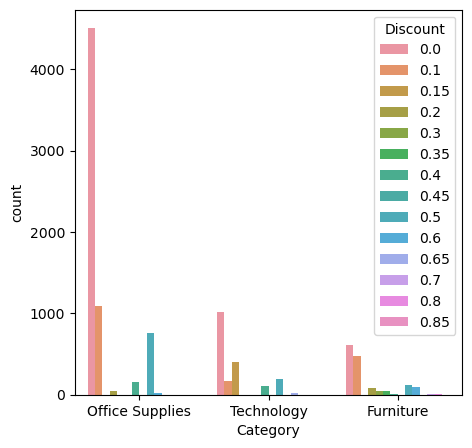

In [78]:
sns.countplot(hue=segmet_df_eu.Discount,x = segmet_df_eu.Category)

<Axes: xlabel='Segment', ylabel='count'>

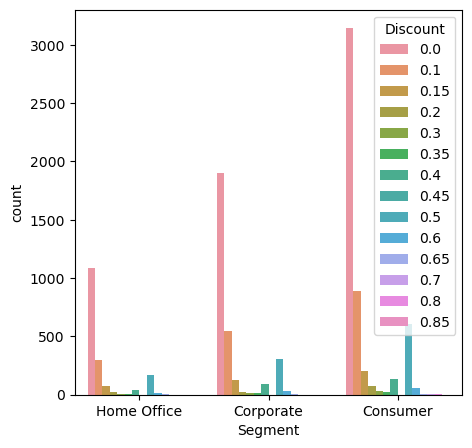

In [79]:
sns.countplot(hue=segmet_df_eu.Discount,x = segmet_df_eu.Segment)

# Africa

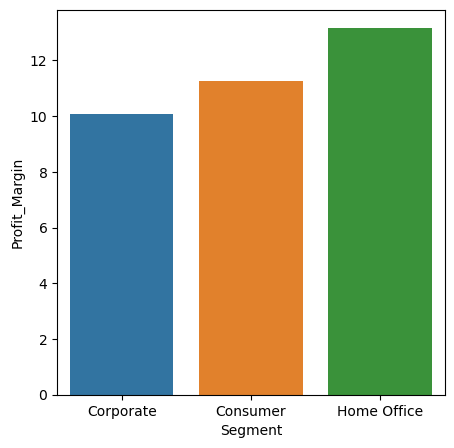

In [80]:
data_Segment = pd.DataFrame()
data_Segment['Sales'] = df[df.Market == 'Africa'].groupby('Segment')['Sales'].mean()
data_Segment['Profit'] = df[df.Market == 'Africa'].groupby('Segment')['Profit'].mean()
data_Segment['Profit_Margin'] =  data_Segment['Profit'] / data_Segment['Sales']*100
data_Segment = data_Segment.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Segment.index,y=data_Segment.Profit_Margin)
plt.show()

In [81]:
segmet_df_a = df [ (df.Market == 'Africa' ) ]

<Axes: xlabel='Category', ylabel='count'>

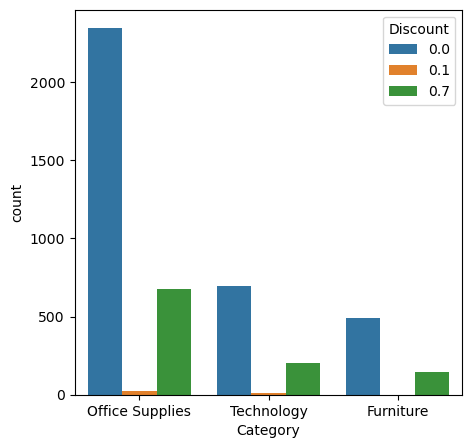

In [82]:
sns.countplot(hue=segmet_df_a.Discount,x = segmet_df_a.Category)

<Axes: xlabel='Segment', ylabel='count'>

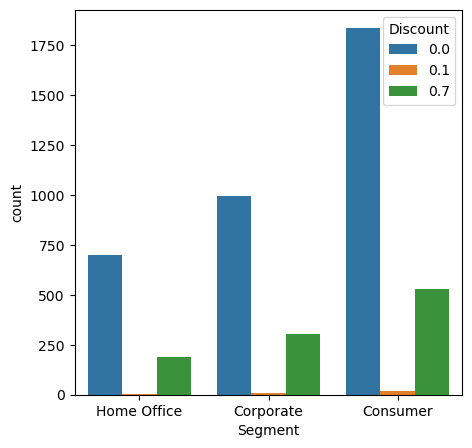

In [83]:
sns.countplot(hue=segmet_df_a.Discount,x = segmet_df_a.Segment)

* Discount are not spreaded ,they are in  extreme values either they are giving 0 or 70% discount they should be give average % of discount

# APAC

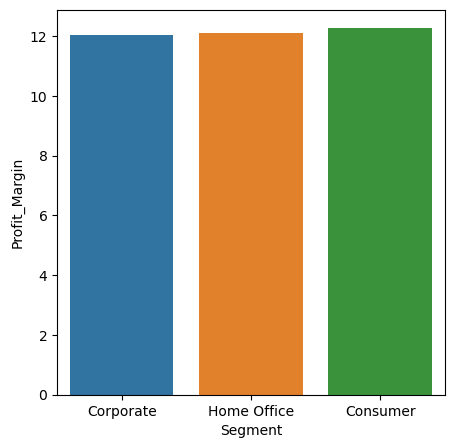

In [84]:
data_Segment = pd.DataFrame()
data_Segment['Sales'] = df[df.Market == 'APAC'].groupby('Segment')['Sales'].mean()
data_Segment['Profit'] = df[df.Market == 'APAC'].groupby('Segment')['Profit'].mean()
data_Segment['Profit_Margin'] =  data_Segment['Profit'] / data_Segment['Sales']*100
data_Segment = data_Segment.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Segment.index,y=data_Segment.Profit_Margin)
plt.show()

In [85]:
segmet_df_apac = df [ (df.Market == 'APAC' ) ]


<Axes: xlabel='Category', ylabel='count'>

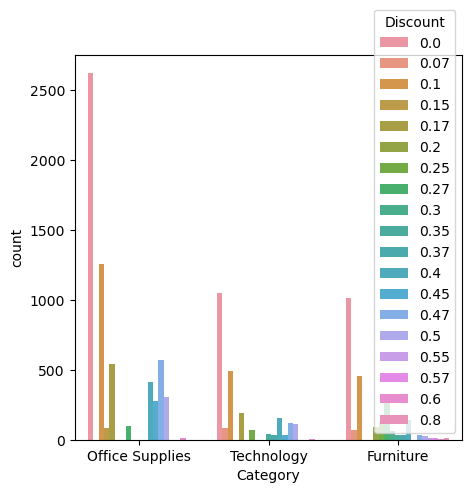

In [86]:
sns.countplot(hue=segmet_df_apac.Discount,x = segmet_df_apac.Category)

* for office supplies, the discount range is around 40%-80% , so we can reduce it to 20%-40%, which may increase the profit margin

<Axes: xlabel='Segment', ylabel='count'>

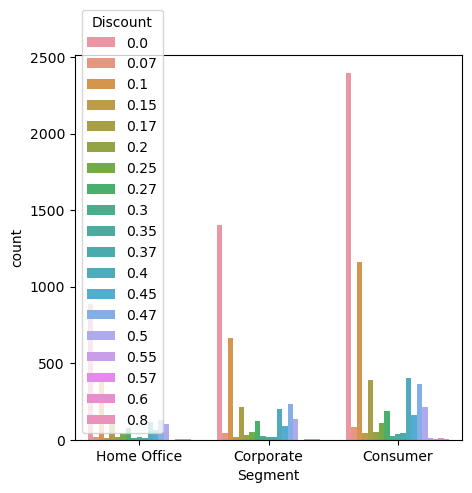

In [87]:
sns.countplot(hue=segmet_df_apac.Discount,x = segmet_df_apac.Segment)

# EMEA

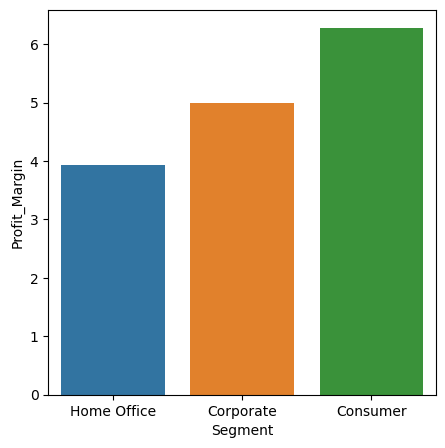

In [88]:
data_Segment = pd.DataFrame()
data_Segment['Sales'] = df[df.Market == 'EMEA'].groupby('Segment')['Sales'].mean()
data_Segment['Profit'] = df[df.Market == 'EMEA'].groupby('Segment')['Profit'].mean()
data_Segment['Profit_Margin'] =  data_Segment['Profit'] / data_Segment['Sales']*100
data_Segment = data_Segment.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Segment.index,y=data_Segment.Profit_Margin)
plt.show()

In [89]:
segmet_df_emea = df [ (df.Market == 'EMEA' ) ]

<Axes: xlabel='Category', ylabel='count'>

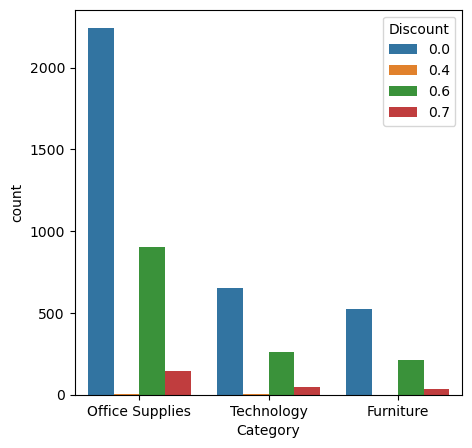

In [90]:
sns.countplot(hue=segmet_df_emea.Discount,x = segmet_df_emea.Category)

* for office supplies, the discount range is around 60%-70% , so we can reduce it to 20%-40%, which may increase the profit margin

<Axes: xlabel='Segment', ylabel='count'>

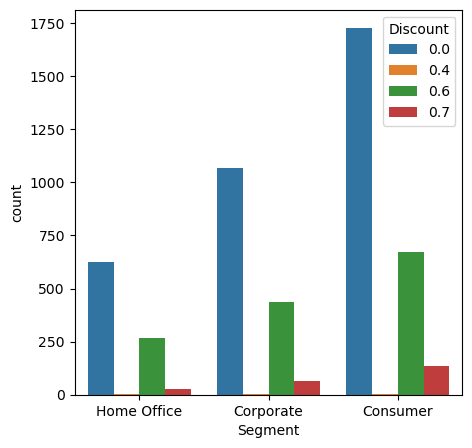

In [91]:
sns.countplot(hue=segmet_df_emea.Discount,x = segmet_df_emea.Segment)

* products are in the discount range of more than 50% ,we can reduce the discount to 20%-30% to increase the profit margin

# LATAM

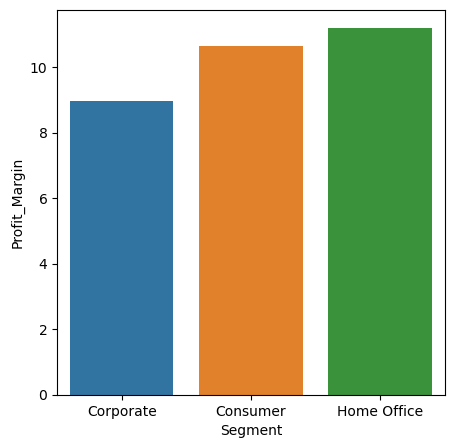

In [92]:
data_Segment = pd.DataFrame()
data_Segment['Sales'] = df[df.Market == 'LATAM'].groupby('Segment')['Sales'].mean()
data_Segment['Profit'] = df[df.Market == 'LATAM'].groupby('Segment')['Profit'].mean()
data_Segment['Profit_Margin'] =  data_Segment['Profit'] / data_Segment['Sales']*100
data_Segment = data_Segment.sort_values('Profit_Margin',ascending=True)
sns.barplot(x=data_Segment.index,y=data_Segment.Profit_Margin)
plt.show()

In [93]:
segmet_df_latam = df [ (df.Market == 'LATAM' ) ]

<Axes: xlabel='Category', ylabel='count'>

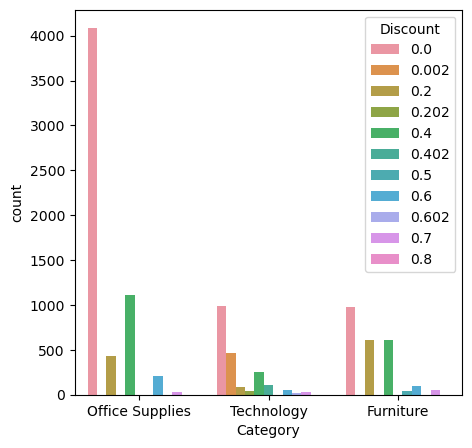

In [94]:
sns.countplot(hue=segmet_df_latam.Discount,x = segmet_df_latam.Category)

<Axes: xlabel='Segment', ylabel='count'>

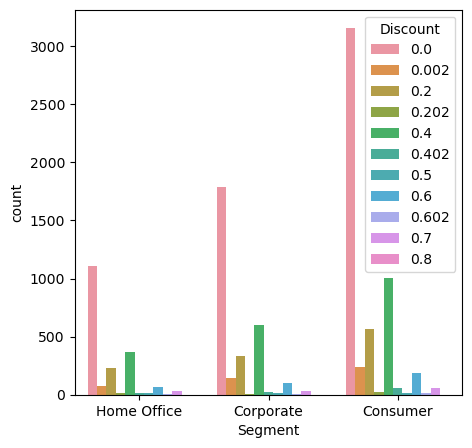

In [95]:
sns.countplot(hue=segmet_df_latam.Discount,x = segmet_df_latam.Segment)

# Trend Analysis

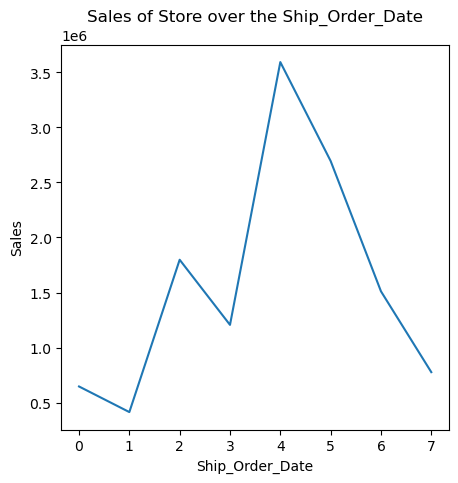

In [96]:
df_sod = df.groupby(['Ship_Order_Date'])['Sales'].sum().reset_index()
sns.lineplot(data=df_sod,x='Ship_Order_Date',y="Sales")
plt.title("Sales of Store over the Ship_Order_Date")
plt.show()

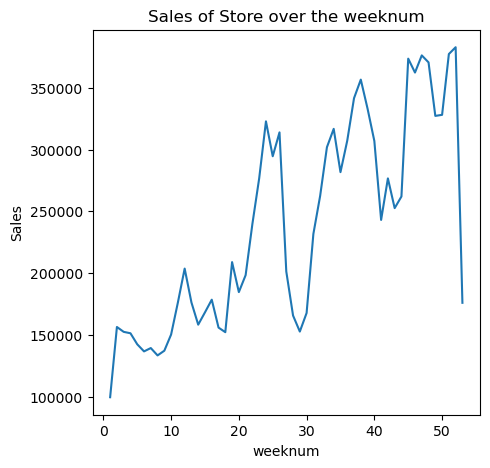

In [97]:
df_weeknum = df.groupby(['weeknum'])['Sales'].sum().reset_index()
sns.lineplot(data=df_weeknum,x='weeknum',y="Sales")
plt.title("Sales of Store over the weeknum")
plt.show()

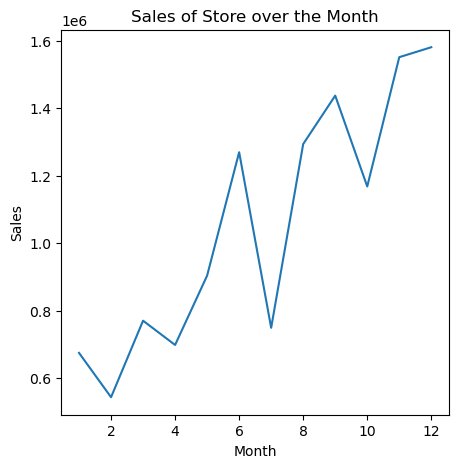

In [98]:
df_month = df.groupby(['Month'])['Sales'].sum().reset_index()
sns.lineplot(data=df_month,x='Month',y="Sales")
plt.title("Sales of Store over the Month")
plt.show()

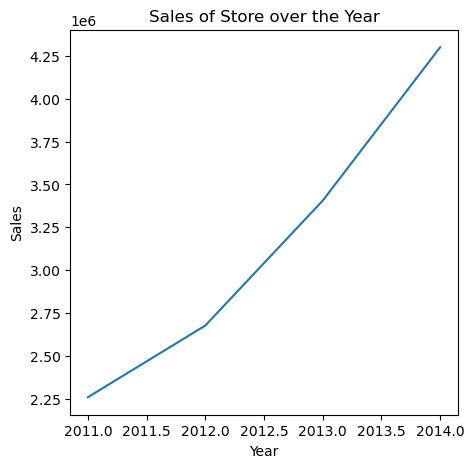

In [99]:
df_year = df.groupby(['Year'])['Sales'].sum().reset_index()
sns.lineplot(data=df_year,x='Year',y="Sales")
plt.title("Sales of Store over the Year")
plt.show()

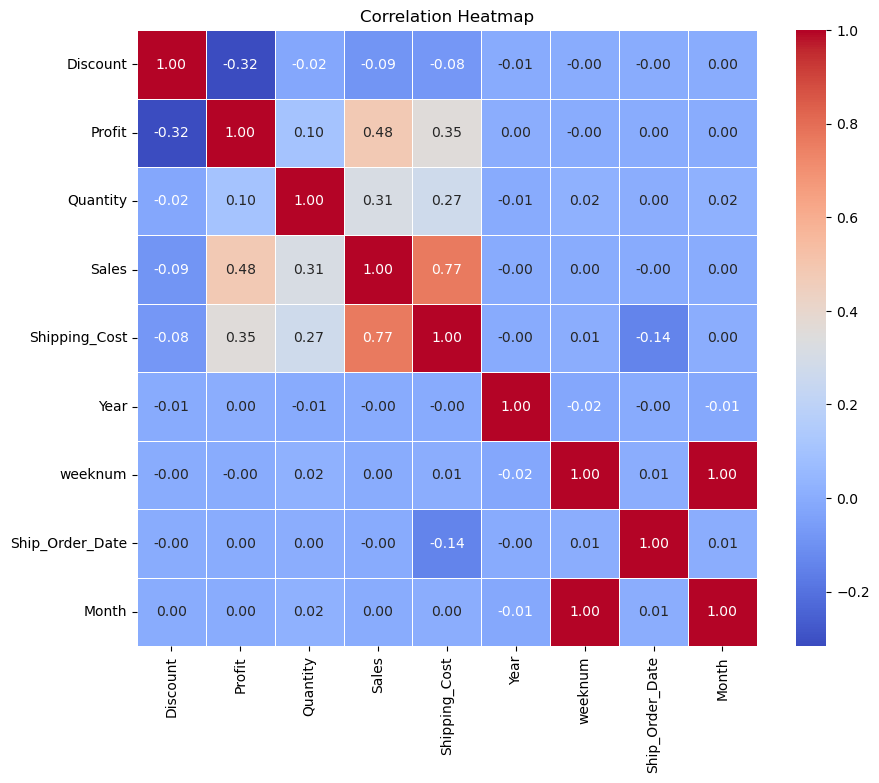

In [100]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

* We can see presence of Multi-collinearity in the correlation Heatmap

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Category         51290 non-null  object        
 1   City             51290 non-null  object        
 2   Country          51290 non-null  object        
 3   Customer_ID      51290 non-null  object        
 4   Customer_Name    51290 non-null  object        
 5   Discount         51290 non-null  float64       
 6   Market           51290 non-null  object        
 7   Order_Date       51290 non-null  datetime64[ns]
 8   Order_ID         51290 non-null  object        
 9   Order_Priority   51290 non-null  object        
 10  Product_ID       51290 non-null  object        
 11  Product_Name     51290 non-null  object        
 12  Profit           51290 non-null  float64       
 13  Quantity         51290 non-null  int64         
 14  Region           51290 non-null  objec

In [102]:
X= df[['Category','Discount','Market','Order_Priority','Quantity','Segment','Ship_Mode','Shipping_Cost','Sub_Category','Year','weeknum','Ship_Order_Date','Month']]
y=df.Sales

# Transformation

In [103]:
X.skew()

Discount           1.387775
Quantity           1.360368
Shipping_Cost      5.863225
Year              -0.344515
weeknum           -0.342451
Ship_Order_Date   -0.432053
Month             -0.357971
dtype: float64

In [104]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X[['Discount','Quantity','Shipping_Cost']] = pt.fit_transform(X[['Discount','Quantity','Shipping_Cost']])

In [105]:
X.skew()

Discount           0.589494
Quantity           0.030884
Shipping_Cost      0.063125
Year              -0.344515
weeknum           -0.342451
Ship_Order_Date   -0.432053
Month             -0.357971
dtype: float64

# Encoding

In [106]:
# dummy encoder
X = pd.get_dummies(X,drop_first=True)

In [107]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Discount                  51290 non-null  float64
 1   Quantity                  51290 non-null  float64
 2   Shipping_Cost             51290 non-null  float64
 3   Year                      51290 non-null  int64  
 4   weeknum                   51290 non-null  int64  
 5   Ship_Order_Date           51290 non-null  int64  
 6   Month                     51290 non-null  int64  
 7   Category_Office Supplies  51290 non-null  uint8  
 8   Category_Technology       51290 non-null  uint8  
 9   Market_Africa             51290 non-null  uint8  
 10  Market_Canada             51290 non-null  uint8  
 11  Market_EMEA               51290 non-null  uint8  
 12  Market_EU                 51290 non-null  uint8  
 13  Market_LATAM              51290 non-null  uint8  
 14  Market

In [108]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, random_state = 10, test_size = 0.3)

x_train=sma.add_constant(xtrain)   
x_test=sma.add_constant(xtest)


In [109]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain[['Year','weeknum','Ship_Order_Date','Month']] = sc.fit_transform(xtrain[['Year','weeknum','Ship_Order_Date','Month']])
xtest[['Year','weeknum','Ship_Order_Date','Month']] = sc.transform(xtest[['Year','weeknum','Ship_Order_Date','Month']])

In [110]:
x_train[['Year','weeknum','Ship_Order_Date','Month']] = sc.fit_transform(x_train[['Year','weeknum','Ship_Order_Date','Month']])
x_test[['Year','weeknum','Ship_Order_Date','Month']] = sc.transform(x_test[['Year','weeknum','Ship_Order_Date','Month']])

In [111]:
import statsmodels.api as sma

model=sma.OLS(ytrain,x_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     631.9
Date:                Tue, 23 Jan 2024   Prob (F-statistic):               0.00
Time:                        14:00:27   Log-Likelihood:            -2.6491e+05
No. Observations:               35903   AIC:                         5.299e+05
Df Residuals:                   35865   BIC:                         5.302e+05
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      113.1630     10.331     10.954      0.000      92.914     133.412
Discount                    -4.0586      2.187     -1.856      0.063      -8.345       0.227
Quantity                    51.6588      2.631     19.636      0.000      46.502      56.815
Shipping_Cost              254.7138      3.582     71.114      0.000     247.693     261.734
Year                         0.4128      2.052      0.201      0.841      -3.610       4.436
weeknum                     36.6466     22.909      1.600      0.110      -8.255      81.549
Ship_Order_Date              0.9763      4.081      0.239      0.811      -7.022       8.975
Month                      -36.5834     22.908     -1.597      0.110     -81.483       8.316
Category_Office Supplies   -41.3532      4.591     -9.007      0.000     -50.352     -32.355
Category_Technology       -108.9952      7.968    -13.679      0.000    -124.613     -93.378
Market_Africa               22.5808      8.447      2.673      0.008       6.025      39.137
Market_Canada               13.2069     24.158      0.547      0.585     -34.143      60.557
Market_EMEA                 19.0829      8.184      2.332      0.020       3.042      35.124
Market_EU                  -24.7743      6.500     -3.811      0.000     -37.515     -12.034
Market_LATAM               -54.7763      6.460     -8.479      0.000     -67.438     -42.115
Market_US                   41.3785      6.728      6.150      0.000      28.192      54.565
Order_Priority_High         79.4060      8.676      9.153      0.000      62.401      96.411
Order_Priority_Low          55.2349     14.071      3.926      0.000      27.656      82.814
Order_Priority_Medium      161.6619      9.232     17.512      0.000     143.568     179.756
Segment_Corporate           -3.1804      4.700     -0.677      0.499     -12.392       6.031
Segment_Home Office          4.6128      5.598      0.824      0.410      -6.360      15.586
Ship_Mode_Same Day          14.2252     11.548      1.232      0.218      -8.410      36.860
Ship_Mode_Second Class      40.2678      7.422      5.425      0.000      25.720      54.815
Ship_Mode_Standard Class    61.0795      8.570      7.127      0.000      44.282      77.877
Sub_Category_Appliances    162.5025     10.786     15.066      0.000     141.361     183.644
Sub_Category_Art           -52.1255      6.537     -7.974      0.000     -64.939     -39.312
Sub_Category_Binders        11.1069      6.049      1.836      0.066      -0.748      22.962
Sub_Category_Bookcases      90.2271      9.124      9.889      0.000      72.345     108.110
Sub_Category_Chairs        -16.3457      7.810     -2.093      0.036     -31.653      -1.039
Sub_Category_Copiers       268.9313     13.226     20.333      0.000     243.007     294.855
Sub_Category_E

**Test of Multicollinearity - variance_inflation_factor**

In [112]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
vf = [vif(x_train,i) for i in range(X.shape[1])]
pd.DataFrame(vf,index=X.columns,columns = ['vif'])

vif
Discount                    0.000000
Quantity                    1.144177
Shipping_Cost               1.658356
Year                        3.053517
weeknum                     1.006696
Ship_Order_Date           125.420994
Month                       3.979713
Category_Office Supplies  125.408308
Category_Technology              inf
Market_Africa                    inf
Market_Canada               1.402250
Market_EMEA                 1.044781
Market_EU                   1.425085
Market_LATAM                1.583695
Market_US                   1.599550
Order_Priority_High         1.684666
Order_Priority_Low          3.787142
Order_Priority_Medium       2.125843
Segment_Corporate           4.976854
Segment_Home Office         1.104703
Ship_Mode_Same Day          1.105408
Ship_Mode_Second Class      1.573583
Ship_Mode_Standard Class    2.110360
Sub_Category_Appliances     4.213155
Sub_Category_Art                 inf
Sub_Category_Binders             inf
Sub_Category_Bookcases           inf
Sub_Category_Chairs              inf
Sub_Category_Copiers             inf
Sub_Category_Envelopes      1.722657
Sub_Category_Fasteners           inf
Sub_Category_Furnishings         inf
Sub_Category_Labels              inf
Sub_Category_Machines            inf
Sub_Category_Paper          1.484652
Sub_Category_Phones              inf
Sub_Category_Storage        1.996578
Sub_Category_Supplies            inf
Sub_Category_Tables              inf

**This indicates there is a presence of Multi-collinearity**

**Test of Linearity - Rainbow Test**

H0 : Data has Linear Relationship with the Target

Ha : Data has not Linear Relationship with the Target

In [113]:
sma.stats.linear_rainbow(model)

(1.2916013013694598, 6.402681898258929e-66)

* **Since the p value is less than 0.05. We have reject H0.** 
* **Data has not Linear Relationship with the Target.**

**Test of Normality - Jarque Bera Test**

H0 : Data/Residual are normal

Ha : Data/Residual are not normal

In [114]:
stats.jarque_bera(model.resid)

SignificanceResult(statistic=369270000.9457271, pvalue=0.0)

* **Since the p value is less than 0.05. We have reject H0.** 
* **Data/Residual are not normal.**

**Homoscadesity**

Null Hypothesis (H0): Homoscedasticity is present (the residuals are distributed with equal variance)<br>
Alternative Hypothesis (HA): Heteroscedasticity is present (the residuals are not distributed with equal variance)

In [115]:
import statsmodels.stats.api as sma
#model.exog : It represenets all the data points or innput variabels
#exog : Independet Varaibes
#endog : Depedent variables
# this is compare betweeen residual vs actual values

sma.het_breuschpagan(model.resid,model.model.exog)

(295.59289154668005,
 3.6842352125201184e-41,
 8.046791472371373,
 2.8742545846784605e-42)

* **Since the p value is less than 0.05. We have reject H0.** 
* **Homoscedasticity is present (the residuals are distributed with equal variance)**

**Test for Autocorrelation - Durbin Watson**

The `Durbin-Watson` test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation<br>
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation <br>
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

In [116]:
from statsmodels.stats.stattools import durbin_watson
durbin_watson(model.resid)

2.0172742773749928

Durbin-Watson test statistic is near to 2: no autocorrelation

In [117]:
# full model

lr = LinearRegression()

lr.fit(xtrain,ytrain)
y_pred_train = lr.predict(xtrain)
y_pred_test = lr.predict(xtest)

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_lr = [train_r2,test_r2,train_rmse,test_rmse]
res_lr

[0.3946318951658092,
 0.44662599445577655,
 387.3949484941593,
 344.07749693682644]

In [118]:
results = pd.DataFrame()
results['LinearRegression'] = res_lr

In [119]:
results.index = ['Train-R2 Score','Test-R2 Score','Train-rmse','Test-rmse']

In [120]:
results.T

Train-R2 Score  Test-R2 Score  Train-rmse   Test-rmse
LinearRegression        0.394632       0.446626  387.394948  344.077497

The foundational model demonstrates a 40% R-squared score in the training set and a 45% R-squared score in the testing set, indicating moderate predictive performance on both training and unseen data.

In [121]:
# Feature Selection
# SFS

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr= LinearRegression()
lr_forward = sfs(estimator=lr, k_features = 'best',scoring ='r2',forward = True)
sfs_forward = lr_forward.fit(xtrain,ytrain)

features_forward = list(sfs_forward.k_feature_names_)

features_forward

['Discount',
 'Quantity',
 'Shipping_Cost',
 'Category_Office Supplies',
 'Category_Technology',
 'Market_Africa',
 'Market_Canada',
 'Market_EMEA',
 'Market_EU',
 'Market_LATAM',
 'Market_US',
 'Order_Priority_High',
 'Order_Priority_Low',
 'Order_Priority_Medium',
 'Ship_Mode_Second Class',
 'Ship_Mode_Standard Class',
 'Sub_Category_Appliances',
 'Sub_Category_Binders',
 'Sub_Category_Bookcases',
 'Sub_Category_Chairs',
 'Sub_Category_Copiers',
 'Sub_Category_Fasteners',
 'Sub_Category_Furnishings',
 'Sub_Category_Labels',
 'Sub_Category_Machines',
 'Sub_Category_Paper',
 'Sub_Category_Phones',
 'Sub_Category_Tables']

In [122]:
len(features_forward)

28

In [123]:
# Feature Selection
# SFS

from mlxtend.feature_selection import SequentialFeatureSelector as sfs
lr= LinearRegression()
lr_backward = sfs(estimator=lr, k_features = 'best',scoring ='r2',forward = False)
sfs_backward = lr_backward.fit(xtrain,ytrain)

features_backward = list(sfs_backward.k_feature_names_)

features_backward

['Discount',
 'Quantity',
 'Shipping_Cost',
 'Category_Office Supplies',
 'Category_Technology',
 'Market_Africa',
 'Market_Canada',
 'Market_EMEA',
 'Market_EU',
 'Market_LATAM',
 'Market_US',
 'Order_Priority_High',
 'Order_Priority_Low',
 'Order_Priority_Medium',
 'Ship_Mode_Second Class',
 'Ship_Mode_Standard Class',
 'Sub_Category_Appliances',
 'Sub_Category_Art',
 'Sub_Category_Binders',
 'Sub_Category_Bookcases',
 'Sub_Category_Chairs',
 'Sub_Category_Copiers',
 'Sub_Category_Envelopes',
 'Sub_Category_Fasteners',
 'Sub_Category_Furnishings',
 'Sub_Category_Labels',
 'Sub_Category_Machines',
 'Sub_Category_Phones',
 'Sub_Category_Storage',
 'Sub_Category_Tables']

In [124]:
len(features_backward)

30

In [125]:
# RFE method
from sklearn.feature_selection import RFE

lr= LinearRegression()
rfe = RFE(estimator = lr)

rfe_model = rfe.fit(xtrain,ytrain)

rank_rfe = pd.DataFrame (rfe_model.ranking_,index=xtrain.columns,columns=['Rank'])

In [126]:
features_rank = rank_rfe[rank_rfe.Rank==1].index
features_rank

Index(['Quantity', 'Shipping_Cost', 'Category_Technology', 'Market_LATAM',
       'Order_Priority_High', 'Order_Priority_Low', 'Order_Priority_Medium',
       'Sub_Category_Appliances', 'Sub_Category_Art', 'Sub_Category_Bookcases',
       'Sub_Category_Copiers', 'Sub_Category_Envelopes',
       'Sub_Category_Furnishings', 'Sub_Category_Machines',
       'Sub_Category_Paper', 'Sub_Category_Phones', 'Sub_Category_Storage',
       'Sub_Category_Supplies', 'Sub_Category_Tables'],
      dtype='object')

In [127]:
len(features_rank)

19

In [128]:
# full model
lr = LinearRegression()

lr.fit(xtrain[features_rank],ytrain)
y_pred_train = lr.predict(xtrain[features_rank])
y_pred_test = lr.predict(xtest[features_rank])

train_r2 = r2_score(ytrain,y_pred_train)
test_r2  = r2_score(ytest,y_pred_test)

train_mse = mean_squared_error(ytrain,y_pred_train)
test_mse = mean_squared_error(ytest,y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

res_rfe = [train_r2,test_r2,train_rmse,test_rmse]
res_rfe

[0.39104407058483803,
 0.44405801595166106,
 388.54123602252855,
 344.87493311261983]

In [129]:
results['RFE-LinearRegression'] = res_rfe

In [130]:
results.T

Train-R2 Score  Test-R2 Score  Train-rmse   Test-rmse
LinearRegression            0.394632       0.446626  387.394948  344.077497
RFE-LinearRegression        0.391044       0.444058  388.541236  344.874933

In [131]:
# Regularization - Ridge
r = Ridge()

model_lr = r.fit(xtrain,ytrain)

y_pred_train = model_lr.predict(xtrain)
y_pred_test = model_lr.predict(xtest)

r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_lr_r = [r2_score_train,r2_score_test,rmse_train,rmse_test]

In [132]:
results['Ridge Regularization'] = res_lr_r
results.T

Train-R2 Score  Test-R2 Score  Train-rmse   Test-rmse
LinearRegression            0.394632       0.446626  387.394948  344.077497
RFE-LinearRegression        0.391044       0.444058  388.541236  344.874933
Ridge Regularization        0.394632       0.446633  387.394970  344.075319

In [133]:
# Regularization - Lasso
l = Lasso()

model_lr = l.fit(xtrain,ytrain)

y_pred_train = model_lr.predict(xtrain)
y_pred_test = model_lr.predict(xtest)

r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_lr_l = [r2_score_train,r2_score_test,rmse_train,rmse_test]

In [134]:
results['Lasso Regularization'] = res_lr_l
results.T

Train-R2 Score  Test-R2 Score  Train-rmse   Test-rmse
LinearRegression            0.394632       0.446626  387.394948  344.077497
RFE-LinearRegression        0.391044       0.444058  388.541236  344.874933
Ridge Regularization        0.394632       0.446633  387.394970  344.075319
Lasso Regularization        0.391181       0.443522  388.497593  345.041148

We have conducted a thorough exploration of regularization techniques, employing Ridge and Lasso regression models.

In [135]:
# DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state=0)
model_dt = dt.fit(xtrain,ytrain)

y_pred_train = model_dt.predict(xtrain)
y_pred_test = model_dt.predict(xtest)


r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_dt = [r2_score_train,r2_score_test,rmse_train,rmse_test]
res_dt

[0.9999996494055179, 0.5564718999134319, 0.2948130636532694, 308.040247024578]

In [136]:
results['DecisionTreeRegressor'] = res_dt
results.T

Train-R2 Score  Test-R2 Score  Train-rmse   Test-rmse
LinearRegression             0.394632       0.446626  387.394948  344.077497
RFE-LinearRegression         0.391044       0.444058  388.541236  344.874933
Ridge Regularization         0.394632       0.446633  387.394970  344.075319
Lasso Regularization         0.391181       0.443522  388.497593  345.041148
DecisionTreeRegressor        1.000000       0.556472    0.294813  308.040247

The Decision Tree Regressor exhibits strong performance in the training set, achieving notable results. However, its R-squared score diminishes to 55% in the testing set, prompting exploration of alternative ensemble methods to enhance overall predictive capability.

In [137]:
#RandomForestRegressor
rf = RandomForestRegressor(random_state=0)

model_rf = rf.fit(xtrain,ytrain)

y_pred_train = model_rf.predict(xtrain)
y_pred_test = model_rf.predict(xtest)

r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_rf = [r2_score_train,r2_score_test,rmse_train,rmse_test]
res_rf

[0.9586400233589976,
 0.7940991826538472,
 101.25916179097017,
 209.88235482772765]

In [138]:
results['RandomForestRegressor'] = res_rf
results.T

Train-R2 Score  Test-R2 Score  Train-rmse   Test-rmse
LinearRegression             0.394632       0.446626  387.394948  344.077497
RFE-LinearRegression         0.391044       0.444058  388.541236  344.874933
Ridge Regularization         0.394632       0.446633  387.394970  344.075319
Lasso Regularization         0.391181       0.443522  388.497593  345.041148
DecisionTreeRegressor        1.000000       0.556472    0.294813  308.040247
RandomForestRegressor        0.958640       0.794099  101.259162  209.882355

The Random Tree Regressor demonstrates robust performance with a 95% R-squared score in the training set; however, its efficacy diminishes to 80% in the testing set, highlighting the need for further refinement to ensure consistent predictive accuracy across datasets.

In [139]:
# GradientBoostingRegressor 
gbr = GradientBoostingRegressor(random_state=0)

model_gbr = gbr.fit(xtrain,ytrain)

y_pred_train = model_gbr.predict(xtrain)
y_pred_test = model_gbr.predict(xtest)

r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_gbr = [r2_score_train,r2_score_test,rmse_train,rmse_test]
res_gbr

[0.7995930719516067, 0.8170784993809735, 222.89511530441123, 197.8241328427319]

In [140]:
results['GradientBoostingRegressor'] = res_gbr
results.T

Train-R2 Score  Test-R2 Score  Train-rmse  \
LinearRegression                 0.394632       0.446626  387.394948   
RFE-LinearRegression             0.391044       0.444058  388.541236   
Ridge Regularization             0.394632       0.446633  387.394970   
Lasso Regularization             0.391181       0.443522  388.497593   
DecisionTreeRegressor            1.000000       0.556472    0.294813   
RandomForestRegressor            0.958640       0.794099  101.259162   
GradientBoostingRegressor        0.799593       0.817078  222.895115   

                            Test-rmse  
LinearRegression           344.077497  
RFE-LinearRegression       344.874933  
Ridge Regularization       344.075319  
Lasso Regularization       345.041148  
DecisionTreeRegressor      308.040247  
RandomForestRegressor      209.882355  
GradientBoostingRegressor  197.824133

The Gradient Boosting Regressor exhibits consistent performance with an 80% R-squared score in both the training and testing sets, presenting a notable contrast to the variability observed in the Random Forest Regressor. This underscores the stability and reliability of the Gradient Boosting model across training and unseen data.

In [141]:
# AdaBoostRegressor
abr = AdaBoostRegressor(random_state=0)

model_abr = abr.fit(xtrain,ytrain)

y_pred_train = model_abr.predict(xtrain)
y_pred_test = model_abr.predict(xtest)

r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_abr = [r2_score_train,r2_score_test,rmse_train,rmse_test]
res_abr

[-0.24524364761406137,
 -0.4903930290474148,
 555.6116624146717,
 564.6733587303879]

In [142]:
results['AdaBoostRegressor'] = res_abr
results.T

Train-R2 Score  Test-R2 Score  Train-rmse  \
LinearRegression                 0.394632       0.446626  387.394948   
RFE-LinearRegression             0.391044       0.444058  388.541236   
Ridge Regularization             0.394632       0.446633  387.394970   
Lasso Regularization             0.391181       0.443522  388.497593   
DecisionTreeRegressor            1.000000       0.556472    0.294813   
RandomForestRegressor            0.958640       0.794099  101.259162   
GradientBoostingRegressor        0.799593       0.817078  222.895115   
AdaBoostRegressor               -0.245244      -0.490393  555.611662   

                            Test-rmse  
LinearRegression           344.077497  
RFE-LinearRegression       344.874933  
Ridge Regularization       344.075319  
Lasso Regularization       345.041148  
DecisionTreeRegressor      308.040247  
RandomForestRegressor      209.882355  
GradientBoostingRegressor  197.824133  
AdaBoostRegressor          564.673359

The AdaBoost Regressor demonstrates suboptimal performance, registering a negative R-squared score of -24% in training and -49% in testing datasets. This indicates challenges in capturing the underlying patterns and relationships within the data.

In [143]:
# XGBRegressor
xgb = XGBRegressor(random_state=0)

model_xgb = xgb.fit(xtrain,ytrain)

y_pred_train = model_xgb.predict(xtrain)
y_pred_test = model_xgb.predict(xtest)

r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_xgb = [r2_score_train,r2_score_test,rmse_train,rmse_test]
res_xgb

[0.9570426109942218, 0.7618335430937986, 103.1960618048938, 225.7289133375684]

In [144]:
results['XGBRegressor'] = res_xgb
results.T

Train-R2 Score  Test-R2 Score  Train-rmse  \
LinearRegression                 0.394632       0.446626  387.394948   
RFE-LinearRegression             0.391044       0.444058  388.541236   
Ridge Regularization             0.394632       0.446633  387.394970   
Lasso Regularization             0.391181       0.443522  388.497593   
DecisionTreeRegressor            1.000000       0.556472    0.294813   
RandomForestRegressor            0.958640       0.794099  101.259162   
GradientBoostingRegressor        0.799593       0.817078  222.895115   
AdaBoostRegressor               -0.245244      -0.490393  555.611662   
XGBRegressor                     0.957043       0.761834  103.196062   

                            Test-rmse  
LinearRegression           344.077497  
RFE-LinearRegression       344.874933  
Ridge Regularization       344.075319  
Lasso Regularization       345.041148  
DecisionTreeRegressor      308.040247  
RandomForestRegressor      209.882355  
GradientBoostingRegressor  197.824133  
AdaBoostRegressor          564.673359  
XGBRegressor               225.728913

The XGB Regressor demonstrates robust performance with a 95% R-squared score in the training set; however, its efficacy diminishes to 76% in the testing set, highlighting the need for further refinement to ensure consistent predictive accuracy across datasets.

Upon completing the model building phase and evaluating R2 scores and root mean square error (RMSE) across various models, the Gradient Boosting Regressor emerged with the highest R2 score and the lowest RMSE. Consequently, we further fine-tuned the model parameters to identify the optimal configuration for enhanced predictive performance.

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [146]:
param_grid={
    'n_estimators':[70,75,80],
    'min_samples_leaf':[15,20,25],
    'min_samples_split':[15,20,25],
    'max_depth':[5,6,7]
}
gbr = GradientBoostingRegressor(random_state=0)
rad_cv=RandomizedSearchCV(estimator=gbr,param_distributions=param_grid,cv=3,scoring="r2")
rad_cv.fit(xtrain,ytrain)
rad_cv.best_params_

{'n_estimators': 75,
 'min_samples_split': 25,
 'min_samples_leaf': 20,
 'max_depth': 5}

In [147]:
param_grid={
    'n_estimators':[70,75,80],
    'min_samples_leaf':[15,20,25],
    'min_samples_split':[15,20,25],
    'max_depth':[5,6,7]
}
gbr = GradientBoostingRegressor(random_state=0)
gcv = GridSearchCV(estimator=gbr,param_grid=param_grid,cv=3,scoring='r2')
gcv = gcv.fit(xtrain,ytrain)
gcv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 20,
 'min_samples_split': 15,
 'n_estimators': 75}

In [148]:
#GradientBoostingRegressor
gbr_tuned = GradientBoostingRegressor(max_depth=6,
                                      min_samples_leaf = 20,
                                      min_samples_split= 15,
                                      n_estimators= 75,
                                      random_state=0)

model_gbr_tuned = gbr_tuned.fit(xtrain,ytrain)

y_pred_train = model_gbr_tuned.predict(xtrain)
y_pred_test = model_gbr_tuned.predict(xtest)

r2_score_train = r2_score(ytrain,y_pred_train)
r2_score_test = r2_score(ytest,y_pred_test)

mse_train = mean_squared_error(ytrain,y_pred_train)
mse_test = mean_squared_error(ytest,y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

res_gbr_tuned = [r2_score_train,r2_score_test,rmse_train,rmse_test]
res_gbr_tuned

[0.8225588285632661, 0.82095404788516, 209.73522853747284, 195.71726868680105]

In [149]:
results['GradientBoostingRegressor_tuned'] = res_gbr_tuned
results.T

Train-R2 Score  Test-R2 Score  Train-rmse  \
LinearRegression                       0.394632       0.446626  387.394948   
RFE-LinearRegression                   0.391044       0.444058  388.541236   
Ridge Regularization                   0.394632       0.446633  387.394970   
Lasso Regularization                   0.391181       0.443522  388.497593   
DecisionTreeRegressor                  1.000000       0.556472    0.294813   
RandomForestRegressor                  0.958640       0.794099  101.259162   
GradientBoostingRegressor              0.799593       0.817078  222.895115   
AdaBoostRegressor                     -0.245244      -0.490393  555.611662   
XGBRegressor                           0.957043       0.761834  103.196062   
GradientBoostingRegressor_tuned        0.822559       0.820954  209.735229   

                                  Test-rmse  
LinearRegression                 344.077497  
RFE-LinearRegression             344.874933  
Ridge Regularization             344.075319  
Lasso Regularization             345.041148  
DecisionTreeRegressor            308.040247  
RandomForestRegressor            209.882355  
GradientBoostingRegressor        197.824133  
AdaBoostRegressor                564.673359  
XGBRegressor                     225.728913  
GradientBoostingRegressor_tuned  195.717269

In [150]:
results.T.style.highlight_max(color = 'lightblue', subset = ['Test-R2 Score'])

Following meticulous hyperparameter tuning for the Gradient Boosting Regressor, the refined model yielded commendable outcomes, achieving an 82% R-squared score in both the training and testing datasets. This signifies a robust enhancement in predictive accuracy across diverse sets of data.

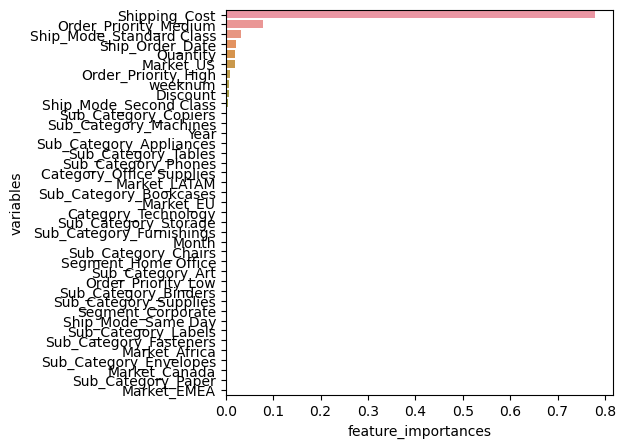

In [151]:
res_gbr_tuned_features = pd.DataFrame()
res_gbr_tuned_features['feature_importances'] = model_gbr_tuned.feature_importances_
res_gbr_tuned_features['variables'] = model_gbr_tuned.feature_names_in_
res_gbr_tuned_features.sort_values(by = 'feature_importances',ascending=False,inplace=True)
sns.barplot(x='feature_importances',y = 'variables',data=res_gbr_tuned_features)
plt.show()

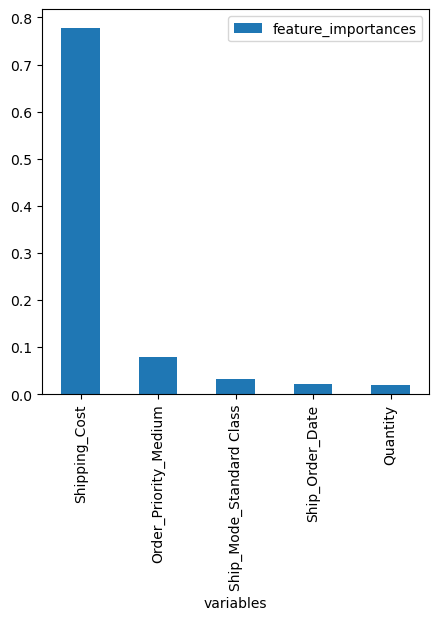

In [152]:
res_gbr_tuned_features.set_index("variables",inplace=True)
res_gbr_tuned_features.sort_values(by="feature_importances",ascending=False).head(5).plot(kind='bar')
plt.show()

The shipping cost emerges as the pivotal feature for predicting sales within our dataset, underscoring its significant impact on the sales prediction model. Its prominence is evident in its influential role in shaping the predictive outcomes.

# CUSTOMER SEGMENTATION - UNSUPERVISED LEARNING

RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

In ecommerce companies like online retails, customer segmentation is necessary in order to understand customers behaviors. It leverages acquired customer data like the one we have in our case, transactions data in order to divide customers into groups.

Our goal is to cluster our customers to get insights in:

Increasing revenue (Knowing customers who present most of our revenue)
Increasing customer retention
Discovering Trends and patterns
Defining customers at risk


In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Category         51290 non-null  object        
 1   City             51290 non-null  object        
 2   Country          51290 non-null  object        
 3   Customer_ID      51290 non-null  object        
 4   Customer_Name    51290 non-null  object        
 5   Discount         51290 non-null  float64       
 6   Market           51290 non-null  object        
 7   Order_Date       51290 non-null  datetime64[ns]
 8   Order_ID         51290 non-null  object        
 9   Order_Priority   51290 non-null  object        
 10  Product_ID       51290 non-null  object        
 11  Product_Name     51290 non-null  object        
 12  Profit           51290 non-null  float64       
 13  Quantity         51290 non-null  int64         
 14  Region           51290 non-null  objec

In [154]:
#remove canceled orders
df = df[df['Quantity']>0]
df.shape

(51290, 26)

In [155]:
print("Summary..")
#exploring the unique values of each attribute
print("Number of transactions: ", df['Order_ID'].nunique())
print("Number of products bought: ",df['Product_ID'].nunique())
print("Number of customers:", df['Customer_ID'].nunique() )
print("Percentage of customers NA: ", round(df['Customer_ID'].isnull().sum() * 100 / len(df),2),"%" )

Summary..
Number of transactions:  25035
Number of products bought:  10292
Number of customers: 4873
Percentage of customers NA:  0.0 %


# Recency

In [156]:
#last date available in our dataset
df['Order_Date'].max()

Timestamp('2014-12-31 00:00:00')

In [157]:
import datetime as dt

In [158]:
now = dt.date(2014,12,31)
print(now)

2014-12-31


In [159]:
df['Order_Date'] = df['Order_Date'].dt.date

In [160]:
df.head()

Category         City        Country Customer_ID     Customer_Name  \
0  Office Supplies  Los Angeles  United States   LS-172304  Lycoris Saunders   
1  Office Supplies  Los Angeles  United States   MV-174854     Mark Van Huff   
2  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
3  Office Supplies  Los Angeles  United States   CS-121304      Chad Sievert   
4  Office Supplies  Los Angeles  United States   AP-109154    Arthur Prichep   

   Discount Market  Order_Date        Order_ID Order_Priority  ...   Segment  \
0       0.0     US  2011-01-07  CA-2011-130813           High  ...  Consumer   
1       0.0     US  2011-01-21  CA-2011-148614         Medium  ...  Consumer   
2       0.0     US  2011-08-05  CA-2011-118962         Medium  ...  Consumer   
3       0.0     US  2011-08-05  CA-2011-118962         Medium  ...  Consumer   
4       0.0     US  2011-09-29  CA-2011-146969           High  ...  Consumer   

        Ship_Mode  Shipping_Cost       State Sub_Category  Year  \
0    Second Class           4.37  California        Paper  2011   
1  Standard Class           0.94  California        Paper  2011   
2  Standard Class           1.81  California        Paper  2011   
3  Standard Class           4.59  California        Paper  2011   
4  Standard Class           1.32  California        Paper  2011   

         Market2 weeknum  Ship_Order_Date Month  
0  North America       2                2     1  
1  North America       4                5     1  
2  North America      32                4     8  
3  North America      32                4     8  
4  North America      40                4     9  

[5 rows x 26 columns]

In [161]:
#group by customers and check last date of purshace
recency_df = df.groupby(by='Customer_ID', as_index=False)['Order_Date'].max()
recency_df.columns = ['Customer_ID','LastPurchaseDate']
recency_df.head()

Customer_ID LastPurchaseDate
0   AA-103151       2014-12-23
1   AA-103152       2014-12-18
2   AA-103153       2013-02-05
3   AA-103154       2014-06-30
4   AA-103751       2014-12-25

In [162]:
#calculate recency
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)

In [163]:
recency_df.head()

Customer_ID LastPurchaseDate  Recency
0   AA-103151       2014-12-23        8
1   AA-103152       2014-12-18       13
2   AA-103153       2013-02-05      694
3   AA-103154       2014-06-30      184
4   AA-103751       2014-12-25        6

In [164]:
#drop LastPurchaseDate as we don't need it anymore
recency_df.drop('LastPurchaseDate',axis=1,inplace=True)

# Frequency

In [165]:
# drop duplicates
df_copy = df
df_copy.drop_duplicates(subset=['Order_ID', 'Customer_ID'], keep="first", inplace=True)
#calculate frequency of purchases
frequency_df = df_copy.groupby(by=['Customer_ID'], as_index=False)['Order_ID'].count()
frequency_df.columns = ['Customer_ID','Frequency']
frequency_df.head()

Customer_ID  Frequency
0   AA-103151          5
1   AA-103152          7
2   AA-103153          2
3   AA-103154          5
4   AA-103751          4

In [166]:
frequency_df.Frequency.max()

18

# Monetary

In [167]:
monetary_df = df.groupby(by='Customer_ID',as_index=False).agg({'Sales': 'sum'})
monetary_df.columns = ['Customer_ID','Monetary']
monetary_df.head()

Customer_ID  Monetary
0   AA-103151       697
1   AA-103152      3750
2   AA-103153       112
3   AA-103154       460
4   AA-103751       934

# Create RFM Table

In [168]:
#merge recency dataframe with frequency dataframe
temp_df = recency_df.merge(frequency_df,on='Customer_ID')
temp_df.head()

Customer_ID  Recency  Frequency
0   AA-103151        8          5
1   AA-103152       13          7
2   AA-103153      694          2
3   AA-103154      184          5
4   AA-103751        6          4

In [169]:
#merge with monetary dataframe to get a table with the 3 columns
rfm_df = temp_df.merge(monetary_df,on='Customer_ID')
#use CustomerID as index
rfm_df.set_index('Customer_ID',inplace=True)
#check the head
rfm_df.head()

Recency  Frequency  Monetary
Customer_ID                              
AA-103151          8          5       697
AA-103152         13          7      3750
AA-103153        694          2       112
AA-103154        184          5       460
AA-103751          6          4       934

# RFM Table Correctness verification

In [170]:
rfm_df[rfm_df['Frequency']==1].head(1)

Recency  Frequency  Monetary
Customer_ID                              
AA-3151          153          1        11

In [171]:
df[df['Customer_ID']=='AA-3151']

Category    City Country Customer_ID Customer_Name  Discount  \
16186  Office Supplies  Kankan  Guinea     AA-3151    Alex Avila       0.0   

       Market  Order_Date      Order_ID Order_Priority  ...   Segment  \
16186  Africa  2014-07-31  GV-2014-7620         Medium  ...  Consumer   

            Ship_Mode  Shipping_Cost   State Sub_Category  Year Market2  \
16186  Standard Class           0.79  Kankan       Labels  2014  Africa   

      weeknum  Ship_Order_Date Month  
16186      31                7     7  

[1 rows x 26 columns]

In [172]:
(now - dt.date(2014,7,31)).days == 153

True

# Top Customers

In [173]:
customers_rank = rfm_df.copy()
# Create a new column that is the rank of the value of coverage in ascending order
customers_rank['Rank'] = customers_rank['Monetary'].rank(ascending=False)
#customers_rank.drop('RevenueRank',axis=1,inplace=True)
customers_rank.head()

Recency  Frequency  Monetary    Rank
Customer_ID                                      
AA-103151          8          5       697  2605.5
AA-103152         13          7      3750   246.0
AA-103153        694          2       112  4289.5
AA-103154        184          5       460  3140.0
AA-103751          6          4       934  2153.5

In [174]:
customers_rank.sort_values('Rank',ascending=True).head()

Recency  Frequency  Monetary  Rank
Customer_ID                                    
SM-203204         79          5     23282   1.0
AB-101054         41         10     12435   2.0
PF-191201         93          8     11981   3.0
HL-150404         43          6     11022   4.0
DR-129401         75         11      9357   5.0

# Applying K-means clustering on RFM variables¶

<Axes: >

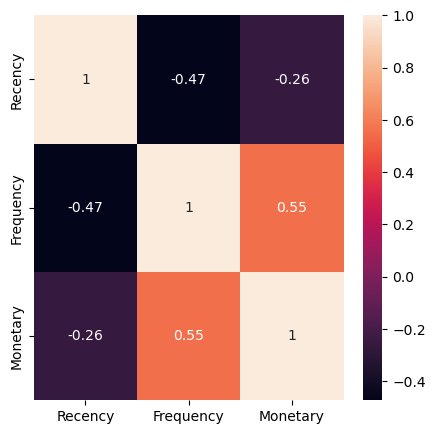

In [175]:
sns.heatmap(rfm_df.corr(),annot=True)

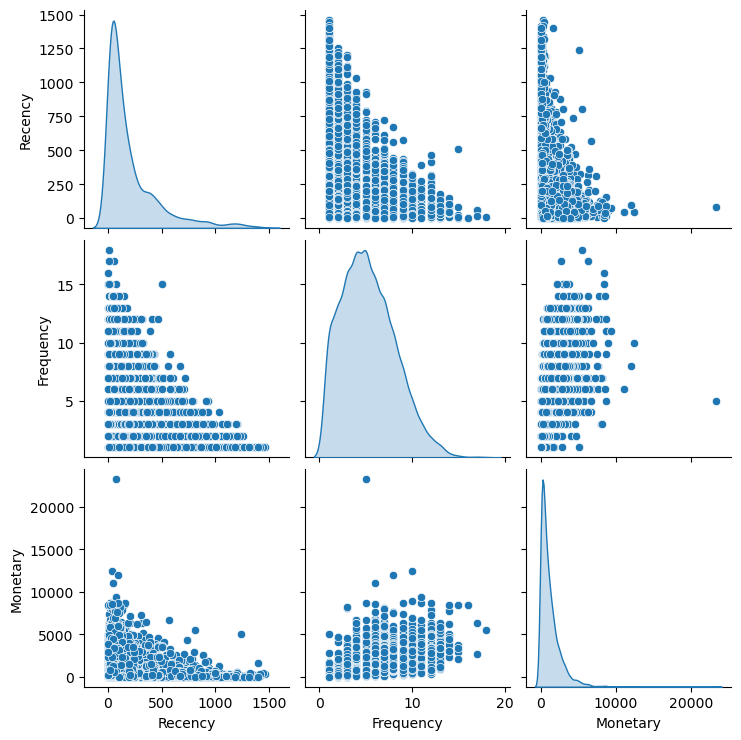

In [176]:
import seaborn as sns
sns.pairplot(rfm_df,diag_kind='kde')

In [177]:
rfm_df.skew()

Recency      2.126019
Frequency    0.529275
Monetary     2.981766
dtype: float64

In [178]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_df = pd.DataFrame(pt.fit_transform(rfm_df),columns=rfm_df.columns)

In [179]:
rfm_df.skew()

Recency     -0.027768
Frequency   -0.048679
Monetary    -0.049838
dtype: float64

<Axes: >

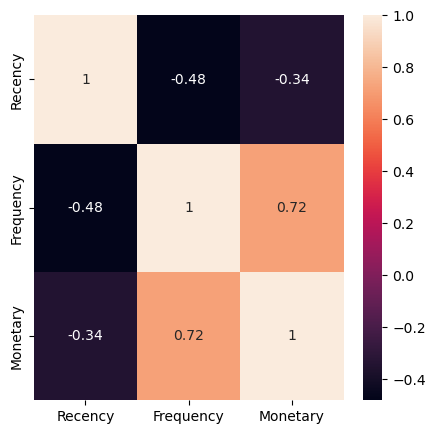

In [180]:
sns.heatmap(rfm_df.corr(),annot=True)

# Kmeans Clustering

In [181]:
wcss = []
for i in range(1, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit(rfm_df)
    wcss.append(kmeans_model.inertia_)
print(wcss)

[14619.000000000005, 7814.01602619153, 6228.64347420144, 4991.369902406343, 4332.9641768615065, 3833.7562014498108, 3495.727230633317, 3240.4039061020176, 3005.283038545599, 2817.7107491831844]


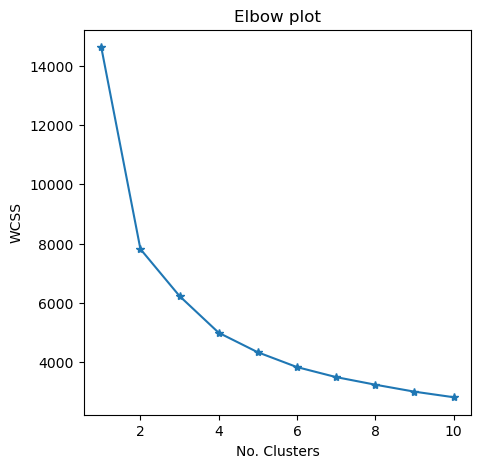

In [182]:
plt.plot(range(1,11), wcss, marker="*")
plt.title("Elbow plot")
plt.xlabel("No. Clusters")
plt.ylabel("WCSS")
plt.show()

The Elbow plot analysis reveals a discernible inflection point in the plot, indicating a definitive change in the trajectory concerning the number of clusters, particularly observed when set at 2.

In [183]:
sc = []
for i in range(2, 11):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    kmeans_model.fit(rfm_df)
    sc.append(silhouette_score(rfm_df, kmeans_model.labels_))
print(sc)

[0.3886276194812284, 0.28049955722266573, 0.2927585982885018, 0.2725209837619904, 0.2641588489181537, 0.2576551195085726, 0.24907339227023756, 0.24571521338148286, 0.2433416061929449]


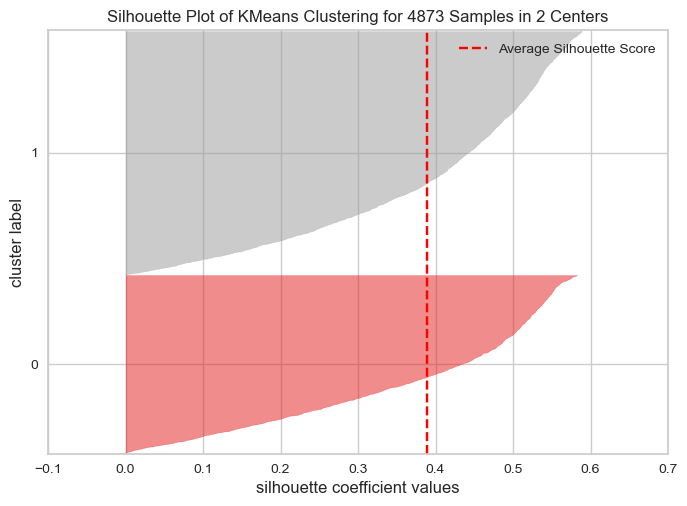

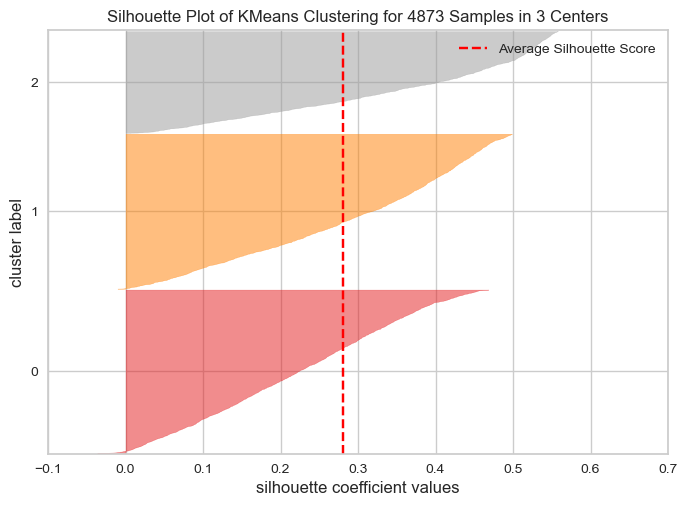

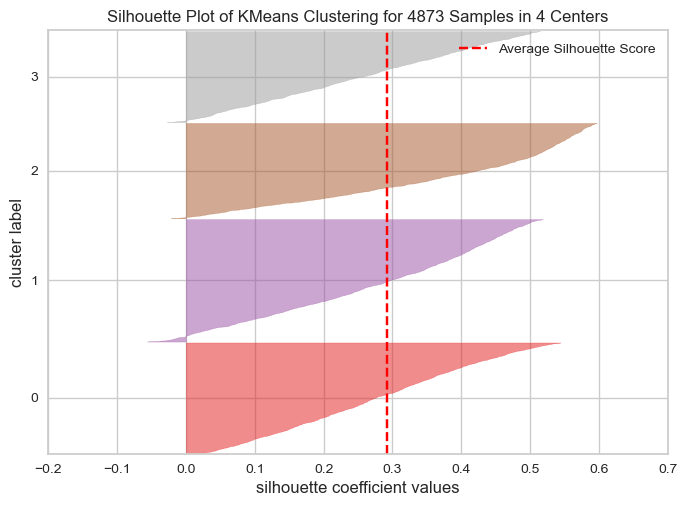

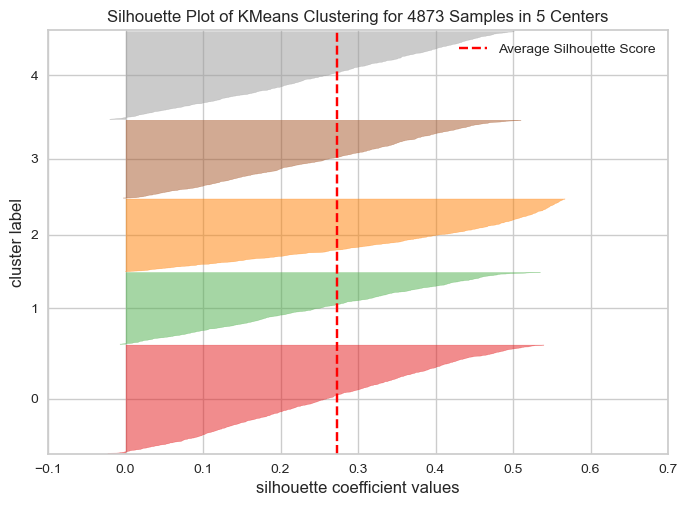

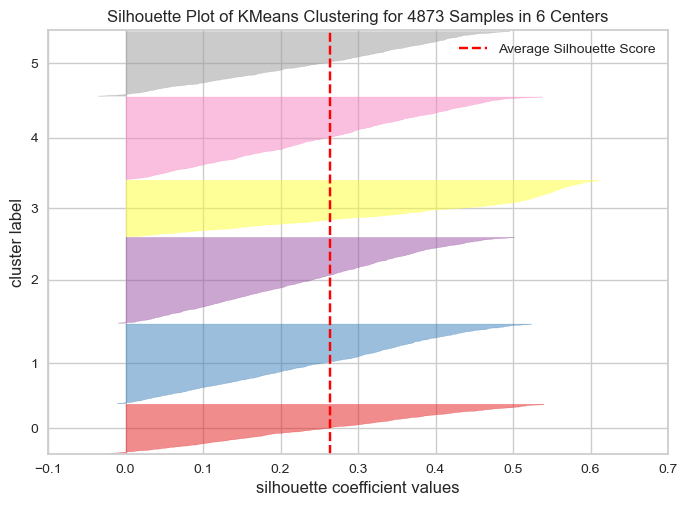

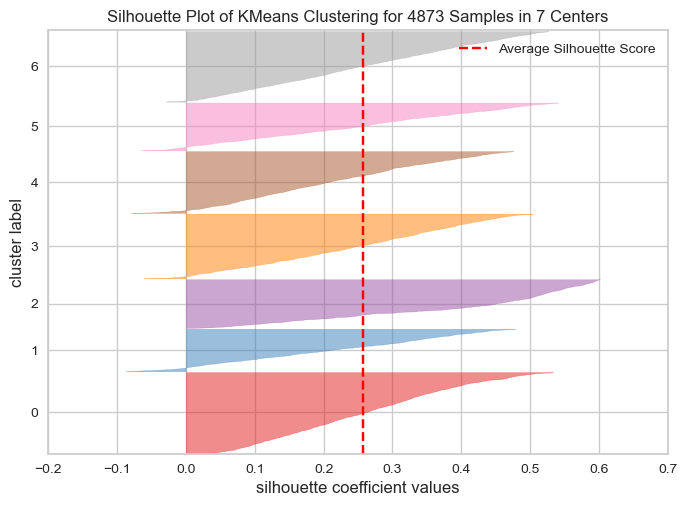

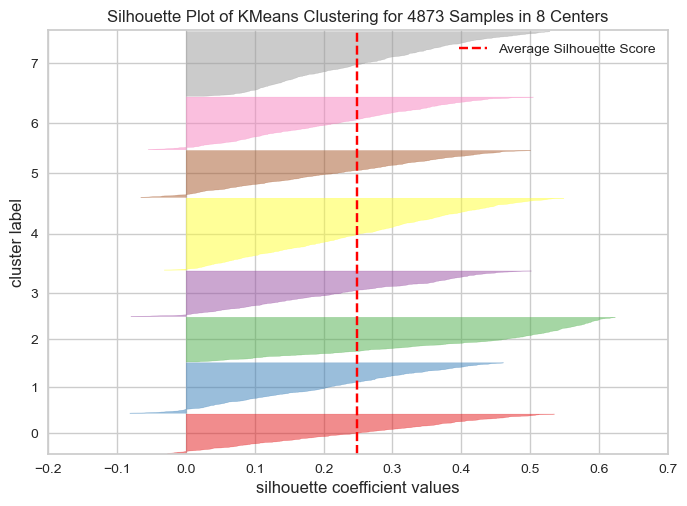

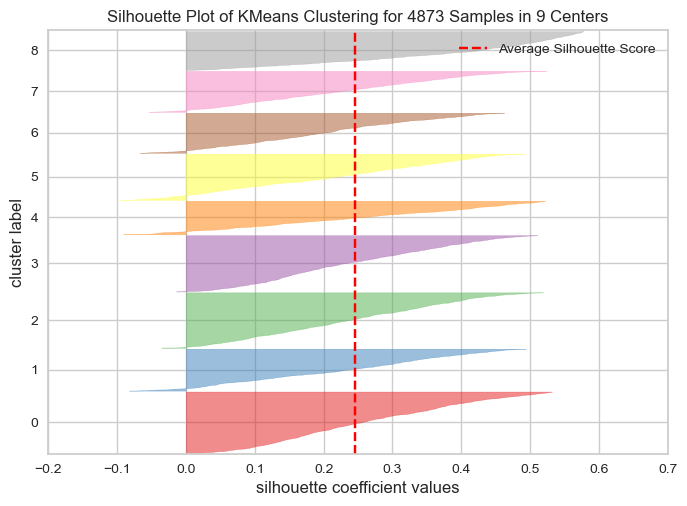

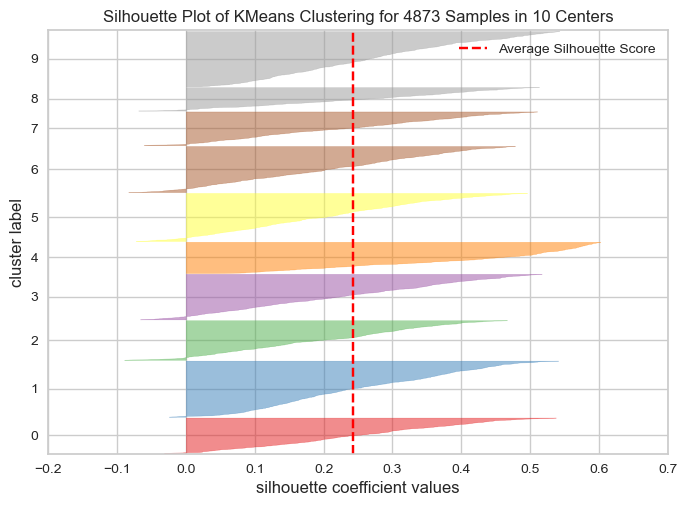

In [184]:
from yellowbrick.cluster import SilhouetteVisualizer
for i in range(2,11):
    kmeans_model = KMeans(n_clusters=i, random_state=0)
    sviz = SilhouetteVisualizer(kmeans_model, color="yellowbrick")
    sviz.fit(rfm_df)
    sviz.show()

The K Means Clustering analysis on our dataset revealed that the maximum silhouette score of 0.38 is achieved when the number of clusters is set to 2. This indicates a noteworthy level of separation and cohesion within the data, suggesting that a two-cluster configuration optimally captures the underlying patterns and structures present in the dataset.


In [185]:
# optimal number of cluster is 2

In [186]:
kmeans_model = KMeans(n_clusters=2, random_state=0)
kmeans_model.fit(rfm_df)

KMeans(n_clusters=2, random_state=0)

In [187]:
rfm_df['Kmeans_label'] = kmeans_model.labels_

In [188]:
rfm_df.head()

Recency  Frequency  Monetary  Kmeans_label
0 -1.569147   0.035450 -0.044127             1
1 -1.334745   0.680850  1.584864             1
2  1.579441  -1.230337 -1.249839             0
3  0.395033   0.035450 -0.362283             0
4 -1.695683  -0.334495  0.197987             1

# Agglomerative Clustering

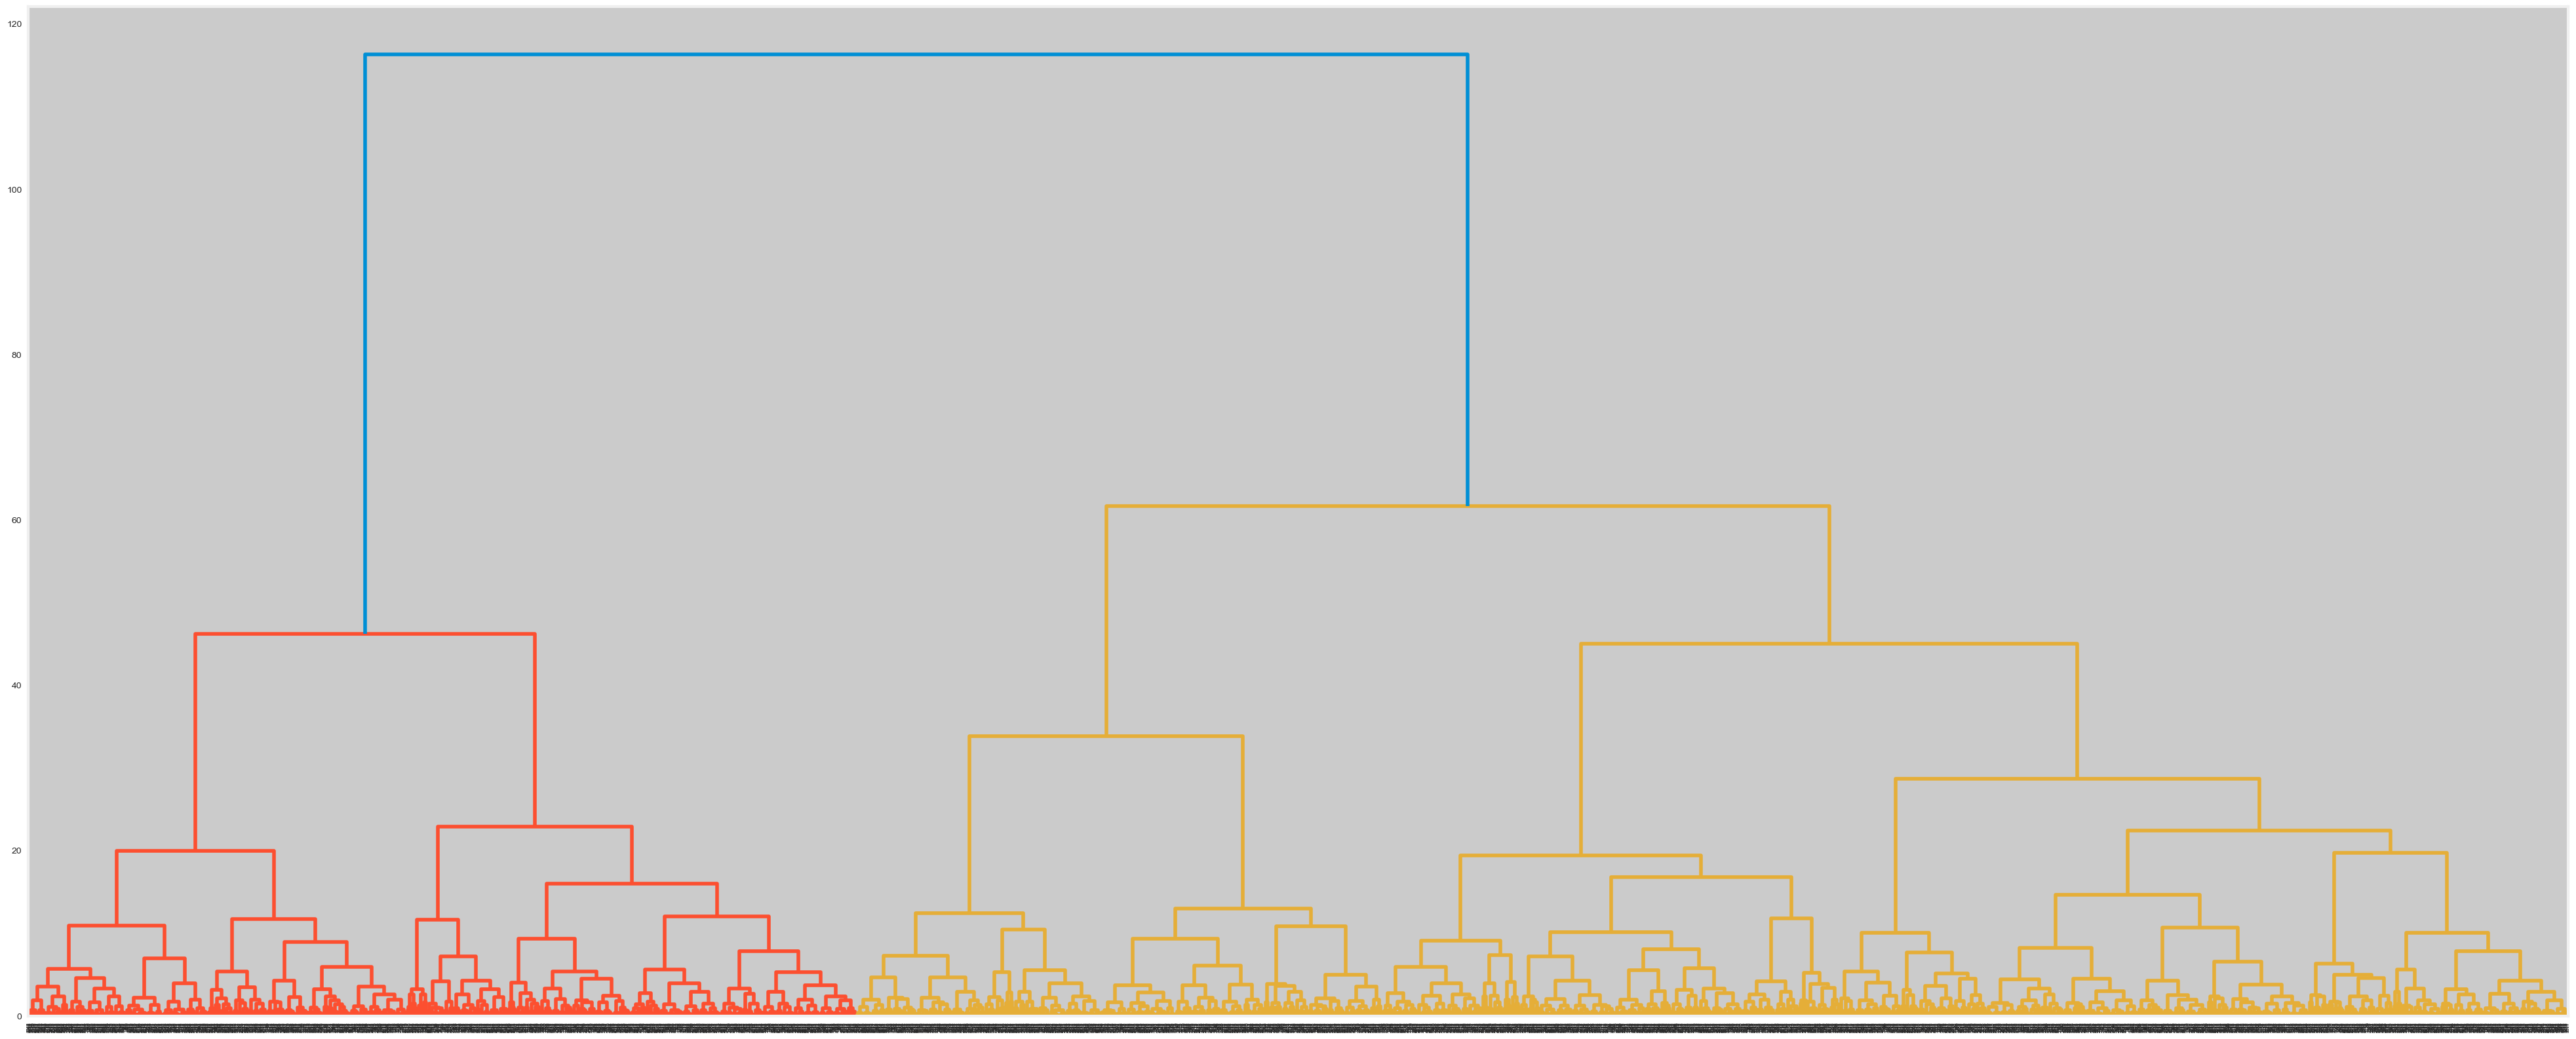

In [189]:
link = linkage(rfm_df, method="ward")
plt.figure(figsize=(50,20))
plt.style.use("fivethirtyeight")
dendrogram(link)
plt.show()

In [190]:
from sklearn.cluster import AgglomerativeClustering

sc = []
for i in range(2,11):
    agglo_model = AgglomerativeClustering(n_clusters=i)
    agglo_model.fit(rfm_df)
    sc.append(silhouette_score(rfm_df,agglo_model.labels_ ))
sc

[0.37448378604986643,
 0.24051291918074147,
 0.24131281029857282,
 0.23133074154642005,
 0.209056584612479,
 0.20438611226071218,
 0.20093554679842404,
 0.2001191174499258,
 0.1871286020536022]

The linkage diagram analysis illustrates the formation of two distinct clusters. Notably, the Agglomerative Clustering model attains its maximum silhouette score, reaching 0.37, when configured with a cluster count of 2.

In [191]:
agglo_model = AgglomerativeClustering(n_clusters=2)
agglo_model.fit(rfm_df)
agglo_model.labels_

array([0, 0, 1, ..., 0, 0, 1], dtype=int64)

In [192]:
rfm_df['agglo_label'] = agglo_model.labels_

In [193]:
rfm_df.head()

Recency  Frequency  Monetary  Kmeans_label  agglo_label
0 -1.569147   0.035450 -0.044127             1            0
1 -1.334745   0.680850  1.584864             1            0
2  1.579441  -1.230337 -1.249839             0            1
3  0.395033   0.035450 -0.362283             0            1
4 -1.695683  -0.334495  0.197987             1            0

In [194]:
DBSCAN_model = DBSCAN(eps=1.4)
DBSCAN_model.fit(rfm_df)
DBSCAN_model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [195]:
pd.Series(DBSCAN_model.labels_).unique()

array([0], dtype=int64)

In [196]:
# plt.rcParams["figure.figsize"]=[10,20]

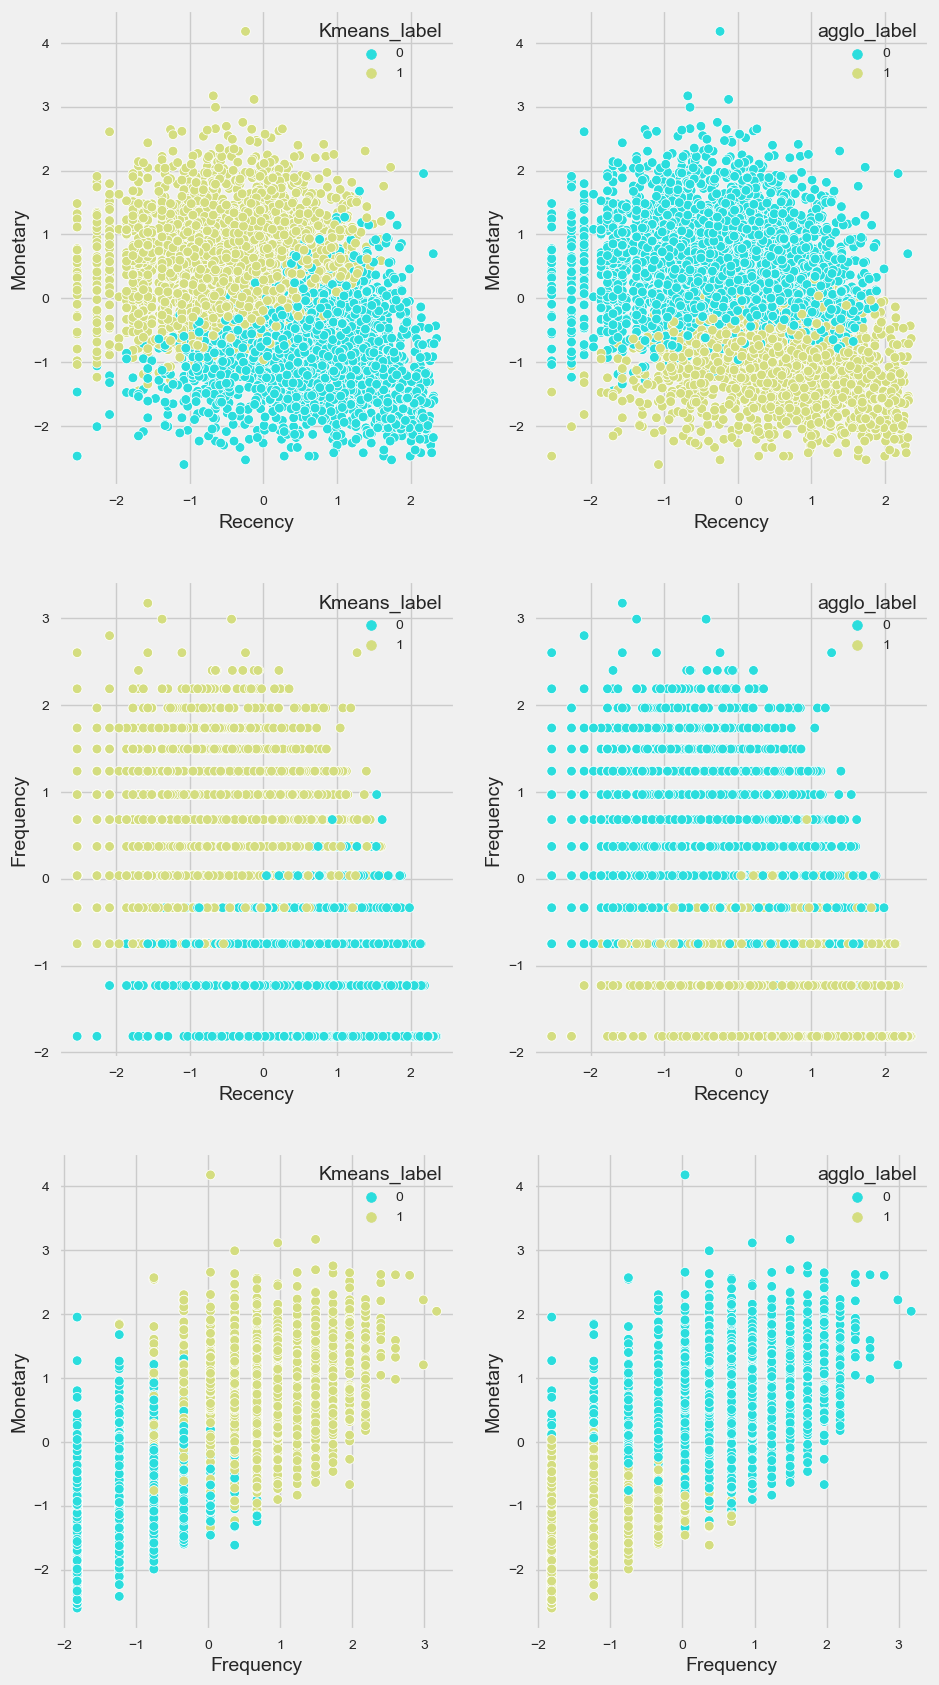

In [197]:
plt.figure(figsize=(10,20))
plt.subplot(3,2,1)
sns.scatterplot(x=rfm_df.Recency,y=rfm_df.Monetary,hue = rfm_df.Kmeans_label,palette='rainbow')
plt.subplot(3,2,2)
sns.scatterplot(x=rfm_df.Recency,y=rfm_df.Monetary,hue = rfm_df.agglo_label,palette='rainbow')
plt.subplot(3,2,3)
sns.scatterplot(x=rfm_df.Recency,y=rfm_df.Frequency ,hue = rfm_df.Kmeans_label,palette='rainbow')
plt.subplot(3,2,4)
sns.scatterplot(x=rfm_df.Recency,y=rfm_df.Frequency,hue = rfm_df.agglo_label,palette='rainbow')
plt.subplot(3,2,5)
sns.scatterplot(x=rfm_df.Frequency,y=rfm_df.Monetary,hue = rfm_df.Kmeans_label,palette='rainbow')
plt.subplot(3,2,6)
sns.scatterplot(x=rfm_df.Frequency,y=rfm_df.Monetary,hue = rfm_df.agglo_label,palette='rainbow')
plt.show()

In K-means clustering, superior cluster quality is observed compared to agglomerative clustering. Within the K-means framework, it becomes apparent that recent buyers tend to be the ones who spend more money. Furthermore, a strong correlation is observed between customers who frequent the store and those identified as recent buyers, indicating that customers who visit the store frequently are also likely to be significant spenders. In essence, there is an interconnection between customers' recency of purchase, frequency of store visits, and higher spending patterns.